In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.cloud import bigquery
import datetime
from google.cloud.bigquery.client import Client
import pandas as pd

In [2]:
import os

In [3]:

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'G:/hedden/asu-msba-free-trial-conversion-credentials.json'
sqlbigquery_data_app = """SELECT * FROM `infusionsoft-looker-poc.asu_msba_free_trial_conversion.CONFIDENTIAL_free_trail_apps_table` """
free_Trial_app_data= pd.read_gbq(sqlbigquery_data_app,
                    project_id='infusionsoft-looker-poc',
                    dialect='standard'
                    )

# head = free_Trial_app_data.head()

# print(free_Trial_app_data.describe())

# deleting test appnames
free_Trial_app_data = free_Trial_app_data[~free_Trial_app_data['app_name'].isin(['tl471', 'wd410', 'mw416', 'kw563', 'ov450'])]

In [4]:
free_Trial_app_data.drop_duplicates(keep="first", inplace=True)

In [5]:
appnamebytrialdate = free_Trial_app_data.groupby(['app_name']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False])

print("number of apps ", appnamebytrialdate['app_name'].nunique())

# getting the list of appnames that have more than one occurance on a day

appnamebytrialdate_size2 =appnamebytrialdate[appnamebytrialdate['size'] == 2]
print("number of apps with size 2", appnamebytrialdate_size2['app_name'].nunique())
appnamebytrialdate_size2_new =free_Trial_app_data[free_Trial_app_data['app_name'].isin(appnamebytrialdate_size2['app_name'])].sort_values(by=['app_name', 'trial_date'])
print("---------------------------------")
appnamebytrialdate_size3 = appnamebytrialdate[appnamebytrialdate['size'] == 3]
print("number of apps with size 3", appnamebytrialdate_size3['app_name'].nunique())
appnamebytrialdate_size3_new =free_Trial_app_data[free_Trial_app_data['app_name'].isin(appnamebytrialdate_size3['app_name'])].sort_values(by=['app_name', 'trial_date'])

        

number of apps  28833
number of apps with size 2 3396
---------------------------------
number of apps with size 3 3


In [6]:

appnamebytrialdate_size1 =appnamebytrialdate[appnamebytrialdate['size'] == 1]
print("number of apps with size 1", appnamebytrialdate_size1['app_name'].nunique())
appnamebytrialdate_size1_new =free_Trial_app_data[free_Trial_app_data['app_name'].isin(appnamebytrialdate_size1['app_name'])].sort_values(by=['app_name', 'trial_date'])
print("---------------------------------")

number of apps with size 1 25221
---------------------------------


In [7]:
columnsubset=['app_name', 'account_id', 'opportunity_id', 'opportunity_stage_name',
       'opportunity_owner_name', 'opportunity_demo_date',
       'is_free_trial_initiated', 'trial_date', 'contact_id',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'count_of_active_users_in_last_6_months',
       'initial_mrr_post_promo', 'current_mrr', 'initial_mrr',
       'initial_edition', 'current_edition_type', 'new_customer_date',
       'start_date', 'kickstart_owner_name', 'kickstart_owner_role',
       'kickstart_type', 'cancel_eligible', 'sales_cohort_date',
       'paying_customer_date', 'contract_status', 'edition_category',
       'promo_customer']

In [8]:
free_Trial_app_data_csubset=free_Trial_app_data[columnsubset]

In [9]:
appnamebytrialdate_csubset = free_Trial_app_data_csubset.groupby(['app_name']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False])

print("number of apps ", appnamebytrialdate_csubset['app_name'].nunique())

# getting the list of appnames that have more than one occurance on a day

appnamebytrialdate_csubset_size2 =appnamebytrialdate_csubset[appnamebytrialdate_csubset['size'] == 2]
print("number of apps with size 2", appnamebytrialdate_csubset_size2['app_name'].nunique())
appnamebytrialdate_csubset_size2_new =free_Trial_app_data_csubset[free_Trial_app_data_csubset['app_name'].isin(appnamebytrialdate_csubset_size2['app_name'])].sort_values(by=['app_name', 'trial_date'])
print("---------------------------------")
appnamebytrialdate_csubset_size3 = appnamebytrialdate_csubset[appnamebytrialdate_csubset['size'] == 3]
print("number of apps with size 3", appnamebytrialdate_csubset_size3['app_name'].nunique())
appnamebytrialdate_csubset_size3_new =free_Trial_app_data_csubset[free_Trial_app_data_csubset['app_name'].isin(appnamebytrialdate_csubset_size3['app_name'])].sort_values(by=['app_name', 'trial_date'])

        

number of apps  28833
number of apps with size 2 3396
---------------------------------
number of apps with size 3 3


In [10]:
appnamebytrialdate_csubset_size1 =appnamebytrialdate_csubset[appnamebytrialdate_csubset['size'] == 1]
print("number of apps with size 1", appnamebytrialdate_csubset_size1['app_name'].nunique())
appnamebytrialdate_csubset_size1_new =free_Trial_app_data_csubset[free_Trial_app_data_csubset['app_name'].isin(appnamebytrialdate_csubset_size1['app_name'])].sort_values(by=['app_name', 'trial_date'])
print("---------------------------------")

number of apps with size 1 25221
---------------------------------


In [11]:
appnamebytrialdate_size2_new_dd=appnamebytrialdate_csubset_size2_new.drop_duplicates(keep="first")

In [12]:
appnamebytrialdate_size2_new_dd_size = appnamebytrialdate_size2_new_dd.groupby(['app_name']).size().to_frame('size2').reset_index().sort_values(['size2'], ascending=[False])

print("number of apps ", appnamebytrialdate_size2_new_dd_size['app_name'].nunique())

# getting the list of appnames that have more than one occurance on a day

appnamebytrialdate_size2_new_dd_size_2 =appnamebytrialdate_size2_new_dd_size[appnamebytrialdate_size2_new_dd_size['size2'] == 2]
print("number of apps with size 2", appnamebytrialdate_size2_new_dd_size_2['app_name'].nunique())
appnamebytrialdate_size2_new_dd_size_2_new =appnamebytrialdate_size2_new_dd[appnamebytrialdate_size2_new_dd['app_name'].isin(appnamebytrialdate_size2_new_dd_size_2['app_name'])].sort_values(by=['app_name', 'trial_date'])


appnamebytrialdate_size2_new_dd_size_1 =appnamebytrialdate_size2_new_dd_size[appnamebytrialdate_size2_new_dd_size['size2'] == 1]
print("number of apps with size 1", appnamebytrialdate_size2_new_dd_size_1['app_name'].nunique())
appnamebytrialdate_size2_new_dd_size_1_new =appnamebytrialdate_size2_new_dd[appnamebytrialdate_size2_new_dd['app_name'].isin(appnamebytrialdate_size2_new_dd_size_1['app_name'])].sort_values(by=['app_name', 'trial_date'])

        
        

number of apps  3396
number of apps with size 2 147
number of apps with size 1 3249


In [13]:
for i in range(0,len(appnamebytrialdate_size2_new_dd_size_2_new)):
    j=i+1
    if (appnamebytrialdate_size2_new_dd_size_2_new.iloc[i]['app_name']==appnamebytrialdate_size2_new_dd_size_2_new.iloc[j]['app_name']):
        for each in appnamebytrialdate_size2_new_dd_size_2_new.columns:
            if (appnamebytrialdate_size2_new_dd_size_2_new.iloc[i][each] !=appnamebytrialdate_size2_new_dd_size_2_new.iloc[j][each]):
                print(appnamebytrialdate_size2_new_dd_size_2_new.iloc[i]['app_name'],"--")
                print(each,"---",appnamebytrialdate_size2_new_dd_size_2_new.iloc[i][each],"--",appnamebytrialdate_size2_new_dd_size_2_new.iloc[j][each])

ab460 --
opportunity_demo_date --- NaT -- NaT
ab460 --
lead_lead_source --- Marketo Campaign -- freetrial.infusionsoft.com
ab460 --
lead_converted_date --- 2018-05-04 00:00:00 -- 2018-07-11 00:00:00
ab460 --
initial_mrr_post_promo --- nan -- nan
ab460 --
current_mrr --- nan -- nan
ab460 --
initial_mrr --- nan -- nan
ab460 --
new_customer_date --- NaT -- NaT
ab460 --
start_date --- NaT -- NaT
ab460 --
sales_cohort_date --- NaT -- NaT
ab460 --
paying_customer_date --- NaT -- NaT
ad384 --
opportunity_demo_date --- NaT -- NaT
ad384 --
trial_date --- 2017-08-11 23:26:43 -- 2017-08-12 06:15:53
ad384 --
count_of_active_users_in_last_6_months --- nan -- nan
ad384 --
initial_mrr_post_promo --- nan -- nan
ad384 --
current_mrr --- nan -- nan
ad384 --
initial_mrr --- nan -- nan
ad384 --
new_customer_date --- NaT -- NaT
ad384 --
start_date --- NaT -- NaT
ad384 --
sales_cohort_date --- NaT -- NaT
ad384 --
paying_customer_date --- NaT -- NaT
ad390 --
opportunity_demo_date --- NaT -- NaT
ad390 --
is_f

dv445 --
paying_customer_date --- NaT -- NaT
dx384 --
opportunity_demo_date --- NaT -- NaT
dx384 --
trial_date --- 2017-08-11 13:31:35 -- 2017-08-12 05:52:45
dx384 --
count_of_active_users_in_last_6_months --- nan -- nan
dx384 --
initial_mrr_post_promo --- nan -- nan
dx384 --
current_mrr --- nan -- nan
dx384 --
initial_mrr --- nan -- nan
dx384 --
new_customer_date --- NaT -- NaT
dx384 --
start_date --- NaT -- NaT
dx384 --
sales_cohort_date --- NaT -- NaT
dx384 --
paying_customer_date --- NaT -- NaT
ei369 --
opportunity_demo_date --- NaT -- NaT
ei369 --
trial_date --- 2017-09-12 17:18:36 -- 2017-09-12 17:19:07
ei369 --
contact_id --- 003f100001cjr2uAAA -- 003f100001ckIwAAAU
ei369 --
lead_converted_date --- NaT -- NaT
ek622 --
opportunity_demo_date --- NaT -- NaT
ek622 --
is_free_trial_initiated --- False -- True
ek622 --
lead_lead_source --- Marketo Campaign -- None
ek622 --
lead_converted_date --- 2016-09-23 00:00:00 -- 2018-09-05 00:00:00
en237 --
opportunity_demo_date --- NaT -- NaT


initial_mrr --- nan -- nan
gp384 --
new_customer_date --- NaT -- NaT
gp384 --
start_date --- NaT -- NaT
gp384 --
sales_cohort_date --- NaT -- NaT
gp384 --
paying_customer_date --- NaT -- NaT
gp532 --
opportunity_demo_date --- NaT -- NaT
gp532 --
lead_lead_source --- None -- freetrial.infusionsoft.com
gp532 --
initial_mrr_post_promo --- nan -- nan
gp532 --
current_mrr --- nan -- nan
gp532 --
initial_mrr --- nan -- nan
gp532 --
new_customer_date --- NaT -- NaT
gp532 --
start_date --- NaT -- NaT
gp532 --
sales_cohort_date --- NaT -- NaT
gp532 --
paying_customer_date --- NaT -- NaT
hh655 --
opportunity_demo_date --- NaT -- NaT
hh655 --
lead_lead_source --- None -- freetrial.infusionsoft.com
hh655 --
initial_mrr_post_promo --- nan -- nan
hh655 --
current_mrr --- nan -- nan
hh655 --
initial_mrr --- nan -- nan
hh655 --
new_customer_date --- NaT -- NaT
hh655 --
start_date --- NaT -- NaT
hh655 --
sales_cohort_date --- NaT -- NaT
hh655 --
paying_customer_date --- NaT -- NaT
hi413 --
opportunity_

paying_customer_date --- NaT -- NaT
js619 --
opportunity_demo_date --- NaT -- NaT
js619 --
is_free_trial_initiated --- False -- True
js619 --
lead_converted_date --- 2018-11-26 00:00:00 -- 2018-11-21 00:00:00
js619 --
current_mrr --- nan -- nan
jx563 --
opportunity_demo_date --- NaT -- NaT
jx563 --
lead_lead_source --- freetrial.infusionsoft.com -- https%3A//www.infusionsoft.com/demo
jx563 --
initial_mrr_post_promo --- nan -- nan
jx563 --
current_mrr --- nan -- nan
jx563 --
initial_mrr --- nan -- nan
jx563 --
new_customer_date --- NaT -- NaT
jx563 --
start_date --- NaT -- NaT
jx563 --
sales_cohort_date --- NaT -- NaT
jx563 --
paying_customer_date --- NaT -- NaT
ka384 --
opportunity_demo_date --- NaT -- NaT
ka384 --
trial_date --- 2017-08-11 11:52:46 -- 2017-08-12 03:51:54
ka384 --
count_of_active_users_in_last_6_months --- nan -- nan
ka384 --
initial_mrr_post_promo --- nan -- nan
ka384 --
current_mrr --- nan -- nan
ka384 --
initial_mrr --- nan -- nan
ka384 --
new_customer_date --- NaT 

lead_lead_source --- http://www.doubleyoursales.com/?utm_source=facebook&utm_medium=ppc&utm_term=warm&utm_content=biz-long&utm_campaign=dys-10-24-16 -- None
mg384 --
lead_converted_date --- 2017-08-12 00:00:00 -- NaT
mg384 --
count_of_active_users_in_last_6_months --- nan -- nan
mg384 --
initial_mrr_post_promo --- nan -- nan
mg384 --
current_mrr --- nan -- nan
mg384 --
initial_mrr --- nan -- nan
mg384 --
new_customer_date --- NaT -- NaT
mg384 --
start_date --- NaT -- NaT
mg384 --
sales_cohort_date --- NaT -- NaT
mg384 --
paying_customer_date --- NaT -- NaT
mh563 --
opportunity_demo_date --- NaT -- NaT
mh563 --
is_free_trial_initiated --- False -- True
mh563 --
lead_lead_source --- None -- freetrial.infusionsoft.com
mh563 --
lead_converted_date --- 2018-07-20 00:00:00 -- 2018-10-03 00:00:00
mp550 --
opportunity_demo_date --- NaT -- NaT
mp550 --
lead_lead_source --- None -- freetrial.infusionsoft.com
mp550 --
lead_converted_date --- 2018-11-15 00:00:00 -- 2018-09-21 00:00:00
mp550 --
ini

contact_id --- 003f1000021xDdEAAU -- 003f1000028tvedAAA
ql546 --
contact_lead_source --- None -- Marketo Campaign
ql546 --
lead_lead_source --- None -- freetrial.infusionsoft.com
ql546 --
lead_converted_date --- NaT -- 2018-09-16 00:00:00
ql546 --
initial_mrr_post_promo --- nan -- nan
ql546 --
current_mrr --- nan -- nan
ql546 --
initial_mrr --- nan -- nan
ql546 --
new_customer_date --- NaT -- NaT
ql546 --
start_date --- NaT -- NaT
ql546 --
sales_cohort_date --- NaT -- NaT
ql546 --
paying_customer_date --- NaT -- NaT
qm425 --
opportunity_demo_date --- NaT -- NaT
qm425 --
lead_lead_source --- www.infusionsoft.com -- direct_offlinechat_equinox__
qm425 --
lead_converted_date --- 2018-01-19 00:00:00 -- 2018-01-22 00:00:00
qm425 --
initial_mrr_post_promo --- nan -- nan
qm425 --
current_mrr --- nan -- nan
qm425 --
initial_mrr --- nan -- nan
qm425 --
new_customer_date --- NaT -- NaT
qm425 --
start_date --- NaT -- NaT
qm425 --
sales_cohort_date --- NaT -- NaT
qm425 --
paying_customer_date --- N

trial_date --- 2017-08-11 05:57:56 -- 2017-08-12 02:54:16
ub384 --
contact_id --- 003f100001ehG09AAE -- 003f100001i9Fx5AAE
ub384 --
contact_lead_source --- Marketo Campaign -- None
ub384 --
contact_phase --- None -- Phase 14
ub384 --
lead_lead_source --- paidsocial_facebook_demo~livewebcast~2017-07-27_20170727-spendseesavea1-liveifsdemo-livevid1_livedemo-sus-vid-combo-big6 -- None
ub384 --
lead_converted_date --- 2017-08-11 00:00:00 -- NaT
ub384 --
count_of_active_users_in_last_6_months --- nan -- nan
ub384 --
initial_mrr_post_promo --- nan -- nan
ub384 --
current_mrr --- nan -- nan
ub384 --
initial_mrr --- nan -- nan
ub384 --
new_customer_date --- NaT -- NaT
ub384 --
start_date --- NaT -- NaT
ub384 --
sales_cohort_date --- NaT -- NaT
ub384 --
paying_customer_date --- NaT -- NaT
ui517 --
opportunity_demo_date --- NaT -- NaT
ui517 --
is_free_trial_initiated --- False -- True
ui517 --
lead_lead_source --- cpc_bing_demo~search-bing-brand-dtm-us~2018_t_exact-infusionsoft -- freetrial.infus

trial_date --- 2017-09-12 22:25:07 -- 2017-09-12 22:26:14
zy448 --
contact_id --- 003f100001cbibyAAA -- 003j000001OKib5AAD
zy448 --
contact_lead_source --- None -- mac_customer-marketing_custmktg~mandy-brasser-tagging-webinar-dashboard-notification-8-28-17-8-30-17~2017-08-25__
zy448 --
lead_converted_date --- NaT -- NaT
zy448 --
initial_mrr_post_promo --- nan -- nan
zy448 --
current_mrr --- nan -- nan
zy448 --
initial_mrr --- nan -- nan
zy448 --
new_customer_date --- NaT -- NaT
zy448 --
start_date --- NaT -- NaT
zy448 --
sales_cohort_date --- NaT -- NaT
zy448 --
paying_customer_date --- NaT -- NaT


IndexError: single positional indexer is out-of-bounds

In [17]:
freetrialappdata_new=pd.concat([appnamebytrialdate_csubset_size1_new,appnamebytrialdate_size2_new_dd_size_1_new],axis=0)

In [18]:

# setting target column
freetrialappdata_new['Target'] = list(map((lambda x: 0 if pd.isna(x) else 1),freetrialappdata_new['new_customer_date']))

In [19]:
freetrialappdata_new.drop(['account_id','cancel_eligible', 'contact_id','contract_status','opportunity_id',
       'count_of_active_users_in_last_6_months', 'current_edition_type',
       'current_mrr', 'edition_category','initial_edition', 'initial_mrr',
       'initial_mrr_post_promo', 'is_free_trial_initiated',
       'kickstart_owner_name', 'kickstart_owner_role', 'kickstart_type', 'paying_customer_date','new_customer_date'],axis=1,inplace=True)

In [20]:
freetrialappdata_new.drop(['start_date'],axis=1,inplace=True)

# below is just for analysis.  Donot run

In [ ]:
freetrialappdata_new['trial_date'] = pd.to_datetime(freetrialappdata_new['trial_date'])
freetrialappdata_new['trial_qtr']=freetrialappdata_new['trial_date'].dt.quarter

In [ ]:
freetrialappdata_new['trial_weekday'] = freetrialappdata_new['trial_date'].dt.weekday_name

In [ ]:
freetrialappdata_new['trial_month'] = freetrialappdata_new['trial_date'].dt.month_name()

In [ ]:
pd.pivot_table(freetrialappdata_new,index=["trial_weekday"],values=["Target"],
              aggfunc=[len],fill_value=0)

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,5)
sns.catplot(ax=ax, x="trial_weekday", kind="count", data=freetrialappdata_new,hue="Target",order = freetrialappdata_new["trial_weekday"].value_counts().index);

In [ ]:
sns.catplot(x="trial_qtr", kind="count", data=freetrialappdata_new,hue="Target",order = freetrialappdata_new["trial_qtr"].value_counts().index);

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,5)
sns.catplot(x="trial_month", kind="count", data=freetrialappdata_new,hue="Target",ax=ax,order = freetrialappdata_new["trial_month"].value_counts().index);

In [ ]:
missingvaluecolumns=['opportunity_stage_name','opportunity_owner_name','opportunity_demo_date','contact_lead_source',
                    'contact_phase','lead_lead_source','lead_converted_date','sales_cohort_date',
                    'promo_customer']

for each in missingvaluecolumns:
    each_ind=each+"_ind"
    freetrialappdata_new[each_ind]=list(map((lambda x: 0 if pd.isna(x) else 1),freetrialappdata_new[each]))
datefeatures=['trial_date','opportunity_demo_date','lead_converted_date','sales_cohort_date'] 
from datetime import datetime
newdatecolumns=[]
#X_train[datefeatures].apply(pd.to_datetime())
date_format = "%m/%d/%Y"
for c in datefeatures:
    print("----------")
    cd=c+"date"
    newdatecolumns.append(cd)
    freetrialappdata_new[cd] = pd.to_datetime(freetrialappdata_new[c])
    freetrialappdata_new[cd] = freetrialappdata_new[cd].dt.date
print(newdatecolumns)
freetrialappdata_new.drop(datefeatures,axis=1,inplace=True)

In [ ]:
freetrialappdata_new.head()

In [ ]:
freetrialappdata_new.head()

In [ ]:
freetrialappdata_new.isna().sum()*100/freetrialappdata_new.shape[0]

In [ ]:
#free_Trial_app_data_csubset.drop_duplicates(keep="first")

In [ ]:
#free_Trial_app_data_csubset[free_Trial_app_data_csubset['app_name'].isin(oldcustomers)][['app_name','trial_date','new_customer_date','lost_revenue_date']].sort_values(['app_name'], ascending=[False])

In [ ]:
# for each in ndayslist_modified:
#     print(freetrialappdata_new[each].value_counts())

In [ ]:
freetrialappdata_new.columns

In [ ]:
# pd.pivot_table(freetrialappdata_new,index=["Target"],values=["ndays_new_customer_datedate"],
#                aggfunc=[len],fill_value=0)

In [ ]:
#freetrialappdata_new[freetrialappdata_new['ndays_new_customer_datedate']>=0]

In [ ]:
#days_value_counts=freetrialappdata_new[freetrialappdata_new['ndays_new_customer_datedate']>=0]['ndays_new_customer_datedate'].value_counts()

In [ ]:
#days_value_counts=days_value_counts.to_dict()


In [ ]:
#days_value_counts

In [ ]:
# sumofothers=0
# for k,v in days_value_counts.items():
#     if k not in range(0,14):
#         sumofothers=sumofothers+days_value_counts[k]

In [ ]:
# sumofothers

In [ ]:
#days_value_counts1 = {k: v for k,v in days_value_counts.items() if k in range(0,14)}

In [ ]:
# days_value_counts1=dict(sorted(days_value_counts1.items()))
# days_value_counts1

In [ ]:
# days_value_counts1['sumother']=sumofothers
#days_value_countsd=pd.DataFrame.from_dict(days_value_counts1,orient='index',columns=['count'])

In [ ]:
#days_value_countsd

In [ ]:
days_value_countsd['cumsum']=days_value_countsd['count'].cumsum()
days_value_countsd['cumsum%']=100*days_value_countsd['cumsum']/days_value_countsd['count'].sum()
days_value_countsd

In [ ]:
freetrialappdata_new['app_name'].nunique()

# End Of Free trial Data analysis
Begining of Usage Data analysis

In [21]:
sqlbigquery_data_usage = """SELECT u.* FROM `infusionsoft-looker-poc.asu_msba_free_trial_conversion.CONFIDENTIAL_usage_data` u
        join `infusionsoft-looker-poc.asu_msba_free_trial_conversion.CONFIDENTIAL_free_trail_apps_table`  a
        on u.appname = a.app_name 
        where u.appname not in ('tl471','wd410','mw416','kw563','ov450') and u.date BETWEEN DATE (a.trial_date, "America/Los_Angeles") and 
        IF(date_diff(Date(new_customer_date, "America/Los_Angeles"), Date(trial_date, "America/Los_Angeles"),day)<=13,date(a.new_customer_date,"America/Los_Angeles") ,DATE_ADD( date(a.trial_date,"America/Los_Angeles"), interval 13 DAY))"""


usagedatasetfree= pd.read_gbq(sqlbigquery_data_usage,
                  project_id='infusionsoft-looker-poc',
                  dialect='standard'
                  )

In [22]:

usagedatasetfree1 = usagedatasetfree[usagedatasetfree.appname.isin(freetrialappdata_new['app_name'])]

In [23]:
usagedatasetfree1.sort_values(['appname'], ascending=[False])

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_BROADCAST,NUMCONTACTSSENT_BROADCAST,...,invoice_created,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created
326744,zz640,2018-12-16,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248908,zz640,2018-12-22,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49851,zz640,2018-12-19,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200926,zz640,2018-12-24,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485108,zz640,2018-12-26,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31586,zz640,2018-12-27,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434741,zz640,2018-12-15,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499340,zz640,2018-12-18,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213130,zz640,2018-12-25,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443082,zz640,2018-12-17,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
usagedatasetfree1.sort_values(['appname','date'],ascending=True).groupby('appname').head(3)

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_BROADCAST,NUMCONTACTSSENT_BROADCAST,...,invoice_created,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created
149118,5058974,2018-05-15,True,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149119,5058974,2018-05-15,True,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192536,5058974,2018-05-15,True,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207877,5274174,2017-09-13,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207878,5274174,2017-09-13,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522184,5274174,2017-09-13,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156174,5581874,2017-09-12,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156175,5581874,2017-09-12,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287985,5581874,2017-09-12,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223840,5789774,2017-06-06,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
usagedatasetfree2=usagedatasetfree1.drop_duplicates(keep="first")
usagedatasetfree2

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_BROADCAST,NUMCONTACTSSENT_BROADCAST,...,invoice_created,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created
0,ri578,2018-10-25,False,4.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nz450,2018-04-19,True,3.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hy503,2018-07-19,True,4.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,du584,2018-10-22,False,4.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,zm520,2018-08-19,False,3.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,lk605,2018-11-09,True,453.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ao594,2018-11-12,False,1.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,zl437,2018-03-16,False,1.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,jr533,2018-09-03,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,lo521,2018-06-22,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
usagedatasetfree2.isna().sum()/usagedatasetfree2.shape[0]

In [26]:

from sklearn.impute import SimpleImputer

si=SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

usagedatasetfree2_imp = pd.DataFrame(si.fit_transform(usagedatasetfree2),index=usagedatasetfree2.index,columns=usagedatasetfree2.columns)

In [27]:
for each in ['NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_BROADCAST',
       'NUMCONTACTSSENT_BROADCAST', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       'NUMCONTACTS_RECEIVED', 'NUMEMAILSSENT_NULL', 'NUMCONTACTSSENT_NULL',
       'NUMEMAILSOPENED_AUTO', 'NUMCONTACTSOPENED_AUTO',
       'NUMEMAILSOPENED_MANUAL', 'NUMCONTACTSOPENED_MANUAL',
       'NUMEMAILSOPENED_BROADCAST', 'NUMCONTACTSOPENED_BROADCAST',
       'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_NULL', 'NUMCONTACTSOPENED_NULL',
       'NUMEMAILSCLICKED_AUTO', 'NUMCONTACTSCLICKED_AUTO',
       'NUMEMAILSCLICKED_MANUAL', 'NUMCONTACTSCLICKED_MANUAL',
       'NUMEMAILSCLICKED_BROADCAST', 'NUMCONTACTSCLICKED_BROADCAST',
       'NUMEMAILSCLICKED_AUTO_SYSTEM', 'NUMCONTACTSCLICKED_AUTO_SYSTEM',
       'NUMEMAILSCLICKED_NULL', 'NUMCONTACTSCLICKED_NULL', 'CONTACTS_UPDATED',
       'PROCESSED_FLOW_ITEM_COUNT', 'LOGIN_COUNT', 'USER_LOGINS',
       'WEBFORM_COUNT', 'WEBFORM_NUM_FORMS', 'WEBFORM_NEW_CONTACTS',
       'WEBFORM_REFERRING_DOMAINS', 'SYSTEM_EMAIL_CLK_COUNT',
       'GOAL_ACHIEVED_COUNT', 'FLOW_RECIPIENT_COUNT', 'CONTACT_GROUP_COUNT',
       'CONTACTS_ADDED_AUTO', 'CONTACTS_ADDED_OTHER',
       'TOTAL_CONTACTS_ADDED_AUTO', 'TOTAL_CONTACTS_ADDED_OTHER',
       'WEB_ANALYTICS_NUM_PAGES', 'WEB_ANALYTICS_NUM_PAGEVIEWS',
       'WEB_ANALYTICS_UNIQUE_VISITORS', 'WEB_ANALYTICS_UNIQUE_CONTACTS',
       'WEB_ANALYTICS_UNIQUE_CUSTOMERS', 'WEB_ANALYTICS_TOTAL_VIEWS',
       'total_processed_usd', 'num_integrations', 'broadcasts_created',
       'campaigns_created', 'funnel_created', 'funnel_published',
       'invoice_amount', 'invoice_created', 'num_invoice_promos',
       'invoices_paid', 'lead_sources', 'actions_created',
       'autotag_config_created', 'merchant_account_created',
       'merchant_infu_created', 'number_of_notes_created',
       'number_of_tasks_created']:
    usagedatasetfree2_imp[each]=usagedatasetfree2_imp[each].astype(float)
    

In [28]:
dtypes = pd.DataFrame(usagedatasetfree2_imp.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

72 3


In [29]:
emptycolumns=[]
for each in numeric:
    if usagedatasetfree2_imp[each].sum()==0:
        emptycolumns.append(each)
emptycolumns  

['NUMEMAILSSENT_BROADCAST',
 'NUMCONTACTSSENT_BROADCAST',
 'NUMEMAILSSENT_NULL',
 'NUMCONTACTSSENT_NULL',
 'NUMCONTACTSOPENED_NULL',
 'NUMEMAILSCLICKED_BROADCAST',
 'NUMCONTACTSCLICKED_BROADCAST',
 'NUMEMAILSCLICKED_AUTO_SYSTEM',
 'NUMCONTACTSCLICKED_AUTO_SYSTEM',
 'NUMCONTACTSCLICKED_NULL']

In [30]:
usagedatasetfree2_imp.drop(emptycolumns,axis=1,inplace=True)

In [31]:
mergedata_target = pd.merge(usagedatasetfree2_imp,freetrialappdata_new[['app_name','Target']],how='left',left_on='appname',right_on='app_name')

In [32]:
mergedata_target.drop('app_name',axis=1,inplace=True)

# donot execute below part unless for analysis

In [33]:
usagedatasetfree_first3days=usagedatasetfree2_imp.sort_values(['appname','date'],ascending=True).groupby('appname').head(3)

In [34]:
usagedatasetfree_firstday=usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').head(1)

In [ ]:
usagedatasetfree_first3days['appname'].nunique()

In [ ]:
usagedatasetfree_first3days.head()

In [ ]:
usagedatasetfree_first3days.isna().sum()/usagedatasetfree_first3days.shape[0]

In [ ]:
usagedatasetfree_firstday.isna().sum()/usagedatasetfree_firstday.shape[0]

In [ ]:
mergedata_target.columns

In [ ]:
mergedata_target['Target'].value_counts()

In [ ]:

# take random sample from free trial data from usagedata

def stratified_sample_df(df, col, n_samples):
    #n = min(n_samples, df[col].value_counts().max())
    df_ = df.groupby(col).apply(lambda x: x.sample(min(len(x),n_samples)))
    df_.index = df_.index.droplevel(0)
    return df_

sample_usage = stratified_sample_df(mergedata_target, 'Target', 2500)

In [ ]:
email_features=[]
contact_features=[]
login_features=[]
webform_features=[]
flow_features=[]
webanalytics_features=[]
created_features=[]
others=[]
for each in sample_usage.columns:
    if "EMAIL" in each:
        email_features.append(each)
    elif "CONTACT" in each:
        contact_features.append(each)
    elif "LOGIN" in each:
        login_features.append(each)
    elif "WEBFORM" in each:
        webform_features.append(each)
    elif "WEB_ANALYTICS" in each:
        webanalytics_features.append(each)
    elif "_created" in each:
        created_features.append(each)
    else:
        others.append(each)

In [ ]:
auto_features=[]
auto_system_features=[]
manual_features=[]

for each in sample_usage.columns:
    if "_AUTO_SYSTEM" in each:
        auto_system_features.append(each)
    elif "_AUTO" in each:
        auto_features.append(each)
    elif "_MANUAL" in each:
        manual_features.append(each)

In [ ]:
featurelist1=[email_features,contact_features,login_features,webform_features,flow_features,webanalytics_features,
              created_features,others]

print(email_features,'\n\n',contact_features,'\n\n',login_features,'\n\n',webform_features,'\n\n',webanalytics_features,'\n\n',created_features,'\n\n',others)

In [ ]:
featurelist2=[auto_system_features,auto_features,manual_features]

print(auto_system_features,"\n\n",auto_features,"\n\n",manual_features,"\n\n")

In [ ]:
# i=0
# #tdata[numeric[0:20]].hist(ax = ax2)
# fig, axs = plt.subplots(20, 5, sharey=True, tight_layout=True)
for featurelist in featurelist2:
    for feature in featurelist:
        print("*************",feature,"**************")
        #usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').head(1)
        value_countsd=pd.DataFrame(usagedatasetfree_firstday[feature].value_counts())
        value_countsd.hist()

In [ ]:
for featurelist in featurelist2:
    for feature in featurelist:
        print("*************",feature,"**************")
        usagedatasetfree_secondday=usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').nth(1)
        value_countsd=pd.DataFrame(usagedatasetfree_secondday[feature].value_counts())
        value_countsd.hist()

In [ ]:
for featurelist in featurelist2:
    for feature in featurelist:
        print("*************",feature,"**************")
        usagedatasetfree_thirdday=usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').nth(2)
        value_countsd=pd.DataFrame(usagedatasetfree_thirdday[feature].value_counts())
        value_countsd.hist()

In [ ]:
for featurelist in featurelist2:
    for feature in featurelist:
        print("*************",feature,"**************")
        usagedatasetfree_fourthday=usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').nth(3)
        value_countsd=pd.DataFrame(usagedatasetfree_fourthday[feature].value_counts())
        value_countsd.hist()

In [ ]:
timeseriesdata_target1=pd.DataFrame()

for i in range(0,14):
    df=pd.DataFrame()
    usagedatasetfree_day=sample_usage[sample_usage['Target']==1].sort_values(['appname','date'],ascending=True).groupby('appname').nth(i).reset_index()
    usagedatasetfree_day.fillna(0,inplace=True)
    usagedatasetfree_day.drop(['appname','date','free_email'],inplace=True,axis=1)
    usagedatasetfree_day_sum=usagedatasetfree_day.apply(np.sum)
    df=df.append(pd.DataFrame(usagedatasetfree_day_sum.values, index=usagedatasetfree_day_sum.keys()).T)
    #print(df)
#    usagedatasetfree_day_sum=pd.DataFrame(usagedatasetfree_day.sum())
    timeseriesdata_target1=pd.concat([timeseriesdata_target1,df],axis=0,ignore_index=True)

In [ ]:
timeseriesdata_target1

In [ ]:
timeseriesdata_target1[email_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [ ]:
timeseriesdata_target0=pd.DataFrame()

for i in range(0,14):
    df=pd.DataFrame()
    usagedatasetfree_day=sample_usage[sample_usage['Target']==0].sort_values(['appname','date'],ascending=True).groupby('appname').nth(i).reset_index()
    usagedatasetfree_day.fillna(0,inplace=True)
    usagedatasetfree_day.drop(['appname','date','free_email'],inplace=True,axis=1)
    usagedatasetfree_day_sum=usagedatasetfree_day.apply(np.sum)
    df=df.append(pd.DataFrame(usagedatasetfree_day_sum.values, index=usagedatasetfree_day_sum.keys()).T)
    #print(df)
#    usagedatasetfree_day_sum=pd.DataFrame(usagedatasetfree_day.sum())
    timeseriesdata_target0=pd.concat([timeseriesdata_target0,df],axis=0,ignore_index=True)

In [ ]:
timeseriesdata_target0

In [ ]:
timeseriesdata_target0[email_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(sample_usage[email_features], 10))

In [ ]:
#NUMEMAILSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMEMAILS_RECEIVED,NUMEMAILSSENT_AUTO_SYSTEM
targetcorr={}
for each in email_features:
    targetcorr[each]=sample_usage[each].corr(sample_usage['Target'])


In [ ]:
import operator
targetcorr=dict(sorted(targetcorr.items(), key=operator.itemgetter(1)))
x =list(targetcorr.keys())
y = list(targetcorr.values())

fig, ax = plt.subplots(figsize=(20,10))    
width = 0.85 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#B63A1E")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()

In [ ]:
timeseriesdata_target1[contact_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [ ]:
timeseriesdata_target0[contact_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [ ]:
print(get_top_abs_correlations(sample_usage[contact_features], 10))

In [ ]:
targetcorr={}
for each in contact_features:
    targetcorr[each]=sample_usage[each].corr(sample_usage['Target'])

import operator
targetcorr=dict(sorted(targetcorr.items(), key=operator.itemgetter(1)))
x =list(targetcorr.keys())
y = list(targetcorr.values())

fig, ax = plt.subplots(figsize=(20,10))    
width = 0.85 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#B63A1E")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()    


In [ ]:
contact_features

In [ ]:

timeseriesdata_target1[login_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [ ]:
timeseriesdata_target0[login_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [ ]:
print(get_top_abs_correlations(sample_usage[login_features], 10))

In [ ]:
targetcorr={}
for each in login_features:
    targetcorr[each]=sample_usage[each].corr(sample_usage['Target'])

import operator
targetcorr=dict(sorted(targetcorr.items(), key=operator.itemgetter(1)))
x =list(targetcorr.keys())
y = list(targetcorr.values())

fig, ax = plt.subplots(figsize=(10,5))    
width = 0.85 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#B63A1E")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()    



In [ ]:


timeseriesdata_target1[created_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [ ]:
timeseriesdata_target0[created_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [ ]:



print(get_top_abs_correlations(sample_usage[created_features], 10))

In [ ]:
targetcorr={}
for each in created_features:
    targetcorr[each]=sample_usage[each].corr(sample_usage['Target'])

import operator
targetcorr=dict(sorted(targetcorr.items(), key=operator.itemgetter(1)))
x =list(targetcorr.keys())
y = list(targetcorr.values())

fig, ax = plt.subplots(figsize=(10,5))    
width = 0.85 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#B63A1E")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()    




In [ ]:
#auto_system_features,auto_features,manual_features

In [ ]:
print(get_top_abs_correlations(sample_usage[auto_features], 10))

In [ ]:
print(get_top_abs_correlations(sample_usage[auto_system_features], 10))

In [ ]:
print(get_top_abs_correlations(sample_usage[manual_features], 10))

# Features to be engineered

In [ ]:
# NUMEMAILSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMEMAILS_RECEIVED,NUMEMAILSSENT_AUTO_SYSTEM,
# TOTAL_CONTACTS_ADDED_OTHER,TOTAL_CONTACTS_ADDED_AUTO,'NUMCONTACTSSENT_AUTO_SYSTEM',
# LOGIN_COUNT  USER_LOGINS merchant_infu_created funnel_created broadcasts_created actions_created
# firstlogin secondlogin,CONTACTS_UPDATED

In [ ]:
mergedata_target.shape

In [35]:
sample_usage_counts = mergedata_target.groupby(['appname']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[True])

In [36]:
sample_usage_sorted=mergedata_target.sort_values(['appname','date'],ascending=True)

In [39]:
# sample_usage_adnldata=pd.DataFrame(columns=["appname","PERCNTGEMAILSSENT_AUTO_1stday","PERCNTGEMAILSSENT_AUTO_2ndday","PERCNTGEMAILSSENT_AUTO_3rdday",
#                                             "PERCNTGEMAILSSENT_MANUAL_1stday","PERCNTGEMAILSSENT_MANUAL_2ndday","PERCNTGEMAILSSENT_MANUAL_3rdday",
#                                             "PERCNTGEMAILS_RECEIVED_1stday","PERCNTGEMAILS_RECEIVED_2ndday","PERCNTGEMAILS_RECEIVED_3rdday",
#                                             "PERCNTGEMAILSSENT_AUTO_SYSTEM_1stday","PERCNTGEMAILSSENT_AUTO_SYSTEM_2ndday","PERCNTGEMAILSSENT_AUTO_SYSTEM_3rdday",
#                                             "TOTAL_CONTACTS_ADDED_OTHER_1stday","TOTAL_CONTACTS_ADDED_OTHER_2ndday","TOTAL_CONTACTS_ADDED_OTHER_3rdday",
#                                             "TOTAL_CONTACTS_ADDED_AUTO_1stday","TOTAL_CONTACTS_ADDED_AUTO_2ndday","TOTAL_CONTACTS_ADDED_AUTO_3rdday",
#                                             "PERCNTGCONTACTSSENT_AUTO_SYSTEM_1stday","PERCNTGCONTACTSSENT_AUTO_SYSTEM_2ndday","PERCNTGCONTACTSSENT_AUTO_SYSTEM_3rdday",
#                                             "PERCNTGLOGIN_COUNT_1stday","PERCNTGLOGIN_COUNT_2ndday","PERCNTGLOGIN_COUNT_3rdday" , 
#                                             "PERCNTGUSER_LOGINS_1stday","PERCNTGUSER_LOGINS_2ndday","PERCNTGUSER_LOGINS_3rdday",
#                                             "PERCNTGmerchant_infu_created_1stday","PERCNTGmerchant_infu_created_2ndday","PERCNTGmerchant_infu_created_3rdday",
#                                             "PERCNTGfunnel_created_1stday","PERCNTGfunnel_created_2ndday","PERCNTGfunnel_created_3rdday",
#                                             "PERCNTGbroadcasts_created_1stday" ,"PERCNTGbroadcasts_created_2ndday" ,"PERCNTGbroadcasts_created_3rdday" ,
#                                             "PERCNTGactions_created_1stday","PERCNTGactions_created_2ndday","PERCNTGactions_created_3rdday",
#                                             "firstlogin", "secondlogin"])

Taking a sample to do calcualtions

get first 3 days data of these 

In [37]:
sample_usage_first3days=mergedata_target.sort_values(['appname','date'],ascending=True).groupby('appname').head(3)

In [38]:
sample_usage_firstday=mergedata_target.sort_values(['appname','date'],ascending=True).groupby('appname').head(1)

In [44]:
def first_day_engin(All_data):
    action=[x for x in All_data.columns.tolist() if x not in ['appname','trial_date','date','NUM_CONTACTS','free_email']]
    All_data['Heavy_contact_update']=All_data['CONTACTS_UPDATED'].apply(lambda x:1 if x>10 else 0)
    All_data['Heavy_LOGIN_COUNT']=All_data['LOGIN_COUNT'].apply(lambda x:1 if x>10 else 0)
    All_data['Heavy_CONTACT_GROUP_COUNT']=All_data['CONTACT_GROUP_COUNT'].apply(lambda x:1 if x>40 else 0)
    All_data['Heavy_CONTACTS_ADDED_AUTO']=All_data['CONTACTS_ADDED_AUTO'].apply(lambda x:1 if x>40 else 0)
    All_data['Heavy_CONTACTS_ADDED_OTHER']=All_data['CONTACTS_ADDED_OTHER'].apply(lambda x:1 if x>900 else 0)
    All_data['Heavy_WEB_ANALYTICS_NUM_PAGES']=All_data['WEB_ANALYTICS_NUM_PAGES'].apply(lambda x:1 if x>40 else 0)
    All_data['Heavy_NUMEMAILSSENT_AUTO']=All_data['NUMEMAILSSENT_AUTO'].apply(lambda x:1 if x>100 else 0)
    All_data['Heavy_NUMEMAILSSENT_MANUAL']=All_data['NUMEMAILSSENT_MANUAL'].apply(lambda x:1 if x>10 else 0)
    All_data['total_action']=All_data[action].sum(axis=1)
    All_data['Heavy_total_action']=All_data['total_action'].apply(lambda x:1 if x>1.300000e+01 else 0)
    email=['NUMEMAILSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
        'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMEMAILS_RECEIVED',
       'NUMEMAILSOPENED_AUTO', 
       'NUMEMAILSOPENED_MANUAL', 
       'NUMEMAILSOPENED_BROADCAST', 
       'NUMEMAILSOPENED_AUTO_SYSTEM', 
       'NUMEMAILSOPENED_NULL', 
       'NUMEMAILSCLICKED_AUTO', 
       'NUMEMAILSCLICKED_MANUAL',  
       'NUMEMAILSCLICKED_NULL',]
    contact=['NUMCONTACTSSENT_AUTO','NUMCONTACTSSENT_MANUAL','NUMCONTACTSSENT_AUTO_SYSTEM','NUMCONTACTS_RECEIVED'
        ,'NUMCONTACTSOPENED_AUTO','NUMCONTACTSOPENED_MANUAL','NUMCONTACTSOPENED_BROADCAST','NUMCONTACTSOPENED_AUTO_SYSTEM',
        'NUMCONTACTSCLICKED_AUTO','NUMCONTACTSCLICKED_MANUAL'
        , 'CONTACTS_UPDATED','CONTACT_GROUP_COUNT',
       'CONTACTS_ADDED_AUTO', 'CONTACTS_ADDED_OTHER','TOTAL_CONTACTS_ADDED_AUTO', 'TOTAL_CONTACTS_ADDED_OTHER']
    Web=['WEBFORM_COUNT', 'WEBFORM_NUM_FORMS', 'WEBFORM_NEW_CONTACTS',
       'WEBFORM_REFERRING_DOMAINS','WEB_ANALYTICS_NUM_PAGES', 'WEB_ANALYTICS_NUM_PAGEVIEWS',
       'WEB_ANALYTICS_UNIQUE_VISITORS', 'WEB_ANALYTICS_UNIQUE_CONTACTS',
       'WEB_ANALYTICS_UNIQUE_CUSTOMERS', 'WEB_ANALYTICS_TOTAL_VIEWS']
    All_data['total_email']=All_data[email].sum(axis=1)
    All_data['total_contact']=All_data[contact].sum(axis=1)
    All_data['total_Web']=All_data[Web].sum(axis=1)
    All_data['email_user']=All_data['total_email'].apply(lambda x: 1 if x>0 else 0)
    All_data['heavy_total_contact']=All_data['total_contact'].apply(lambda x: 1 if x>1.000000e+01 else 0)
    return All_data[['appname','Heavy_contact_update','Heavy_LOGIN_COUNT','Heavy_CONTACT_GROUP_COUNT','Heavy_CONTACTS_ADDED_AUTO','Heavy_CONTACTS_ADDED_OTHER','Heavy_WEB_ANALYTICS_NUM_PAGES','Heavy_NUMEMAILSSENT_AUTO','Heavy_NUMEMAILSSENT_MANUAL','Heavy_total_action','total_email','total_contact','total_Web','email_user','heavy_total_contact']]
fisrt_usage_data= first_day_engin(sample_usage_firstday)

In [47]:
features_tobeengineered=['CONTACTS_UPDATED','NUMEMAILSSENT_AUTO','NUMEMAILSSENT_MANUAL','NUMEMAILS_RECEIVED','NUMEMAILSSENT_AUTO_SYSTEM',
   'TOTAL_CONTACTS_ADDED_OTHER','TOTAL_CONTACTS_ADDED_AUTO','NUMCONTACTSSENT_AUTO_SYSTEM','LOGIN_COUNT', 
                        'USER_LOGINS', 'merchant_infu_created', 'funnel_created', 'broadcasts_created'
                        ,'actions_created']

Get the features to be engineered

In [48]:
sample_usage_subset=sample_usage_first3days[['appname','date','CONTACTS_UPDATED','NUMEMAILSSENT_AUTO','NUMEMAILSSENT_MANUAL','NUMEMAILS_RECEIVED','NUMEMAILSSENT_AUTO_SYSTEM',
   'TOTAL_CONTACTS_ADDED_OTHER','TOTAL_CONTACTS_ADDED_AUTO','NUMCONTACTSSENT_AUTO_SYSTEM','LOGIN_COUNT', 
                        'USER_LOGINS', 'merchant_infu_created', 'funnel_created', 'broadcasts_created'
                        ,'actions_created']]

In [49]:

sample_usage_first3days_sum=sample_usage_first3days.groupby(['appname','free_email']).sum().reset_index()

In [ ]:
# print(sample_usage_subset_sum['appname'].nunique())
# print(sample_usage_subset_sum.shape)
# print(sample_usage_subset_sum.columns)

In [ ]:
#sample_usage_subset_sum=sample_usage_subset_sum.add_suffix('_sum')

In [ ]:
# sample_usage_subset_sum.rename(columns={'appname_sum':'appname'},inplace=True )
# print(sample_usage_subset_sum['appname'].nunique())
# print(sample_usage_subset_sum.shape)
# print(sample_usage_subset_sum.columns)

In [50]:
sample_usage_1stday=sample_usage_subset.sort_values(['appname','date'],ascending=True).groupby('appname').nth(0).reset_index()
sample_usage_2ndday=sample_usage_subset.sort_values(['appname','date'],ascending=True).groupby('appname').nth(1).reset_index()
sample_usage_3rdday=sample_usage_subset.sort_values(['appname','date'],ascending=True).groupby('appname').nth(2).reset_index()

sample_usage_1stday=sample_usage_1stday.add_suffix('_1stday')
sample_usage_1stday.rename(columns={'appname_1stday':'appname'},inplace=True )
sample_usage_2ndday=sample_usage_2ndday.add_suffix('_2ndday')
sample_usage_2ndday.rename(columns={'appname_2ndday':'appname'},inplace=True )
sample_usage_3rdday=sample_usage_3rdday.add_suffix('_3rdday')
sample_usage_3rdday.rename(columns={'appname_3rdday':'appname'},inplace=True )


df_final=sample_usage_1stday.merge(sample_usage_2ndday,on='appname',how='left').merge(sample_usage_3rdday,on='appname',how='left')

# import functools

# dfs = [sample_usage_subset_sum, sample_usage_1stday, sample_usage_2ndday,]

# df_final = functools.reduce(lambda left,right: pd.merge(left,right,on='date'), dfs)




# # sample_usage_subset_sum=pd.concat([sample_usage_subset_sum.set_index('appname_sum'), sample_usage_1stday.set_index('appname_1stday'),
# #                                   sample_usage_2ndday.set_index('appname_2ndday'), sample_usage_3rdday.set_index('appname_3rdday')], 
# #                    axis='columns')




In [51]:
df_final=df_final.fillna(0)

In [52]:
for each in features_tobeengineered:
    df_final[each+"_diff1stand2nd"]=df_final[each+'_2ndday']-df_final[each+'_1stday']
    df_final[each+"_diff1stand2nd_trend"]=list(map((lambda x1,x2: "no change" if (x1==x2 and x1==0.0) else " change"),df_final[each+'_2ndday'],df_final[each+'_1stday']))
    df_final[each+"_diff2ndand3rd"]=df_final[each+'_3rdday']-df_final[each+'_2ndday']
    df_final[each+"_diff2ndand3rd_trend"]=list(map((lambda x1,x2: "no change" if (x1==x2 and x1==0.0) else " change"),df_final[each+'_3rdday'],df_final[each+'_2ndday']))
    
    
    

In [53]:
sample_usage_first3days_final=sample_usage_first3days_sum.merge(df_final,on='appname',how='left')

In [54]:
sample_usage_first3days_final=sample_usage_first3days_final.drop(['Target'],axis=1)

In [ ]:
print(sample_usage_first3days_final['appname'].nunique())
print(sample_usage_first3days_final.shape)
#print(sample_usage_sum.columns)

# EDA around usage of first and first 3 days

#EMAILS EDA

In [55]:
emails_sample_usage_1stday=mergedata_target.sort_values(['appname','date'],ascending=True).groupby('appname').nth(0).reset_index()

In [56]:
emails_sample_usage_1stday=emails_sample_usage_1stday[['appname','date','NUMEMAILSCLICKED_AUTO',
       'NUMEMAILSCLICKED_MANUAL', 'NUMEMAILSCLICKED_NULL',
       'NUMEMAILSOPENED_AUTO', 'NUMEMAILSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_BROADCAST', 'NUMEMAILSOPENED_MANUAL',
       'NUMEMAILSOPENED_NULL', 'NUMEMAILSSENT_AUTO',
       'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMEMAILSSENT_MANUAL',
       'NUMEMAILS_RECEIVED','SYSTEM_EMAIL_CLK_COUNT']]

In [57]:
emails_sample_usage_1stday=emails_sample_usage_1stday.add_suffix('_1stday')

In [58]:
emails_sample_usage_1stday.rename(columns={'appname_1stday':'appname'},inplace=True )

In [59]:
merge_emails_data=pd.merge(emails_sample_usage_1stday,freetrialappdata_new,how='left',left_on='appname',right_on='app_name')

In [60]:
merge_emails_data['date_1stday'] = pd.to_datetime(merge_emails_data['date_1stday'])
merge_emails_data['date_1stday_qtr']=merge_emails_data['date_1stday'].dt.quarter

In [61]:
merge_emails_data['date_1stday_weekday']=merge_emails_data['date_1stday'].dt.weekday_name
merge_emails_data['date_1stday_month']=merge_emails_data['date_1stday'].dt.month_name()

In [62]:
dtypes = pd.DataFrame(merge_emails_data.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

In [64]:

data = pd.concat([merge_emails_data[numeric[0:10]],merge_emails_data['Target']],axis=1)

# fig = plt.figure(figsize = (30,30))
# ax2 = fig.gca()
# tdata=merge_emails_data[numeric]
# #tdata_scale=(tdata-tdata.mean())/tdata.std()
# tdata[numeric].hist(ax = ax2)

# Merging both data

In [65]:
mergedata = pd.merge(sample_usage_first3days_final,freetrialappdata_new,how='left',left_on='appname',right_on='app_name')

In [68]:

# take random sample from free trial data from usagedata

def stratified_sample_df(df, col, n_samples):
    #n = min(n_samples, df[col].value_counts().max())
    df_1 = df.groupby(col).get_group(1).sample(n_samples)
    df_2 = df.groupby(col).get_group(0).sample(10*n_samples)
    df_=pd.concat([df_1,df_2])
    #df_.index = df_.index.droplevel(0)
    return df_

sample = stratified_sample_df(mergedata, 'Target', 250)

In [ ]:
sample.shape

In [ ]:
sample['Target'].value_counts()

In [ ]:
sample.describe()

In [69]:
dtypes = pd.DataFrame(sample.dtypes.rename('type')).reset_index().astype('str')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

In [70]:
emptycolumns=[]
for each in numeric:
    if sample[each].sum()==0:
        emptycolumns.append(each)
emptycolumns  

['NUMEMAILS_RECEIVED',
 'NUMCONTACTS_RECEIVED',
 'NUMEMAILSOPENED_BROADCAST',
 'NUMCONTACTSOPENED_BROADCAST',
 'NUMEMAILSOPENED_AUTO_SYSTEM',
 'NUMCONTACTSOPENED_AUTO_SYSTEM',
 'WEB_ANALYTICS_UNIQUE_CUSTOMERS',
 'campaigns_created',
 'NUMEMAILS_RECEIVED_1stday',
 'NUMEMAILS_RECEIVED_2ndday',
 'NUMEMAILS_RECEIVED_3rdday',
 'NUMEMAILS_RECEIVED_diff1stand2nd',
 'NUMEMAILS_RECEIVED_diff2ndand3rd']

In [71]:
sample.drop(emptycolumns,axis=1,inplace=True)

In [72]:
dtypes = pd.DataFrame(sample.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

120 44


KeyboardInterrupt: 

<Figure size 1440x1440 with 0 Axes>

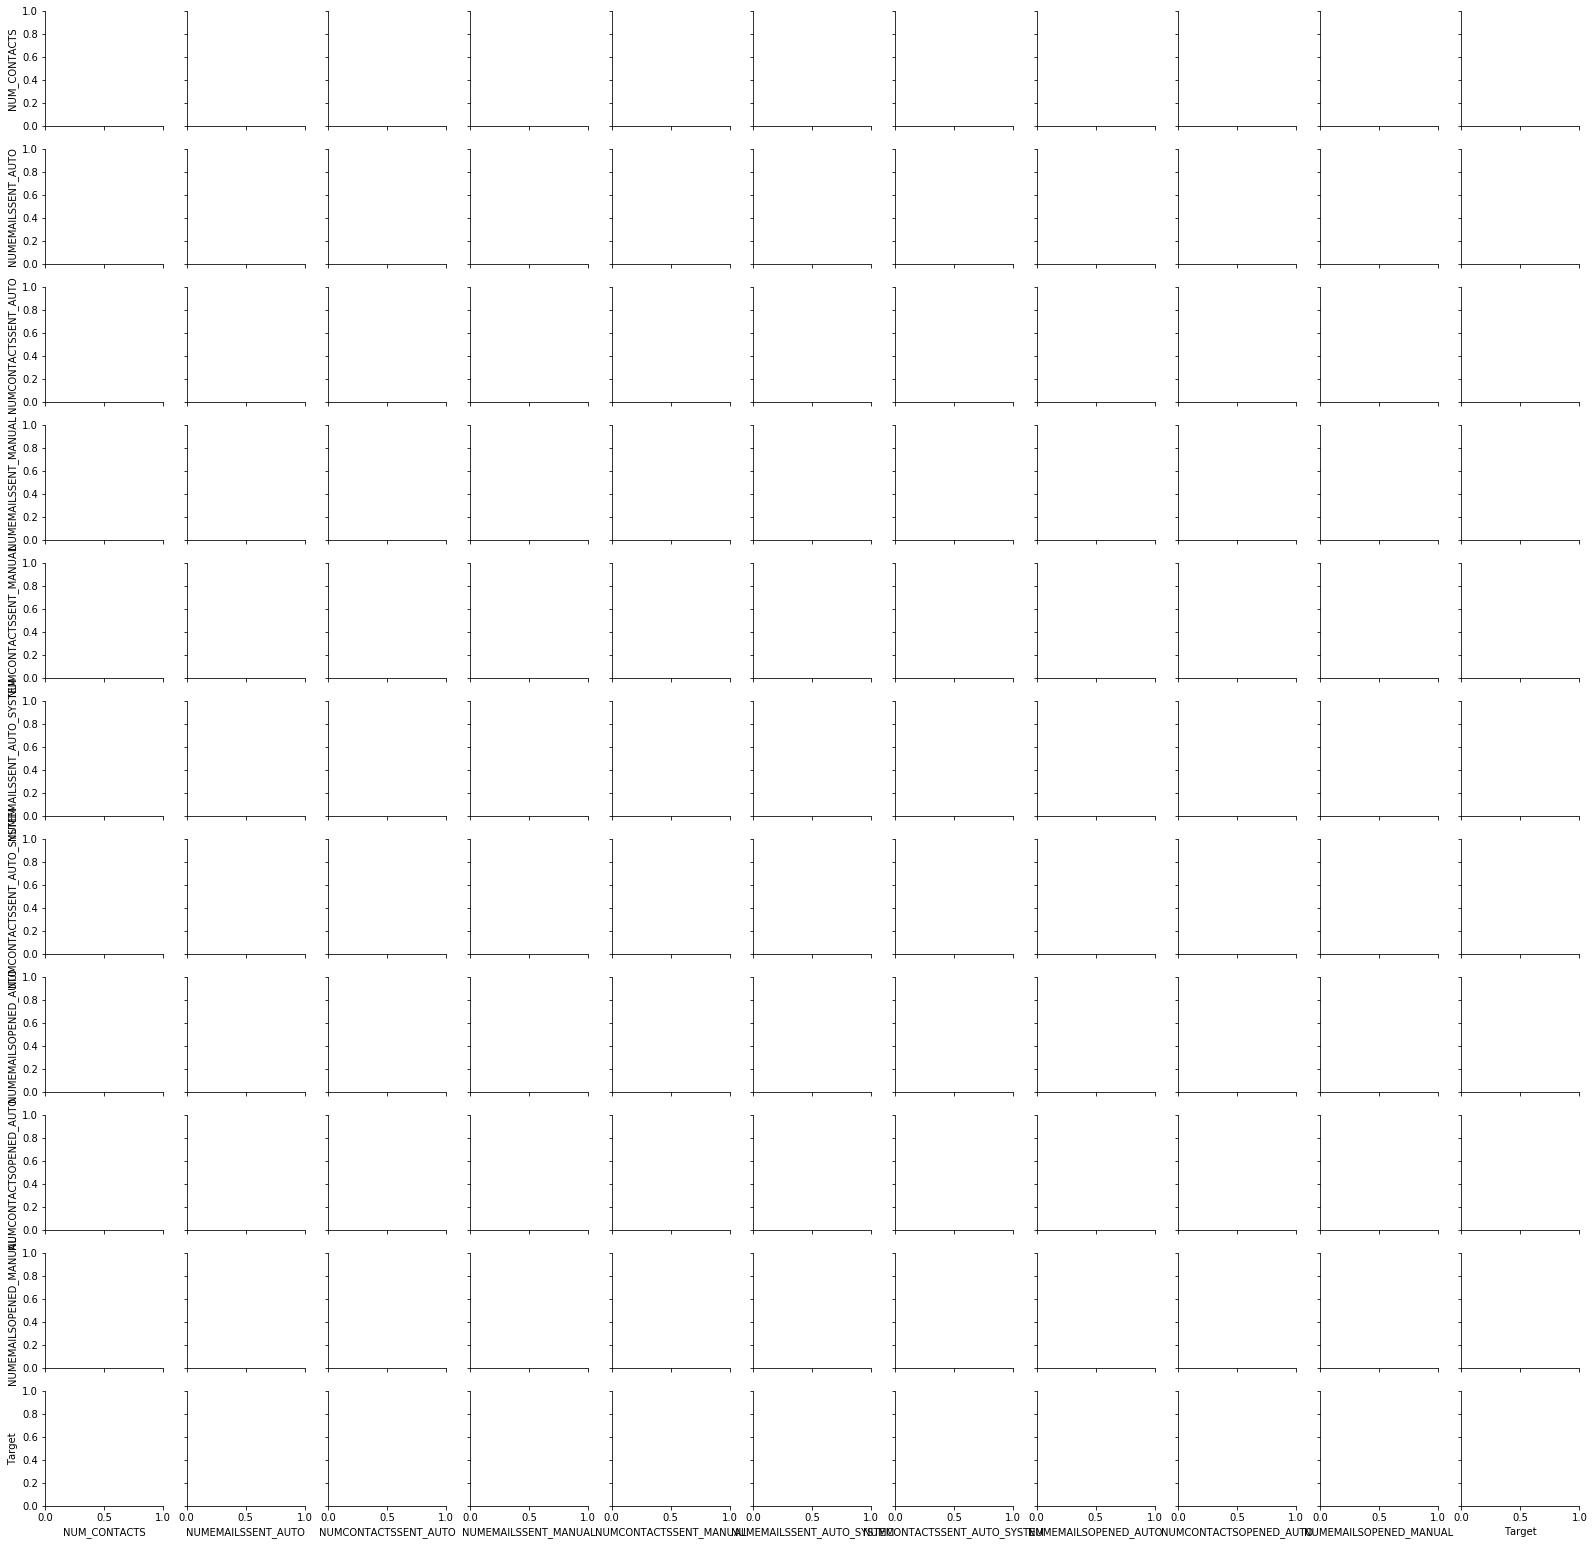

In [73]:
data = pd.concat([sample[numeric[0:10]],sample['Target']],axis=1)
data
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='Target')
# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Pairwise Plots', fontsize=14)

In [ ]:
# data = sample[numeric[51:57]]
# #data
# plt.figure(figsize=(20,20))
# sns.pairplot(data, hue='Target')

In [ ]:
list(sample.columns)

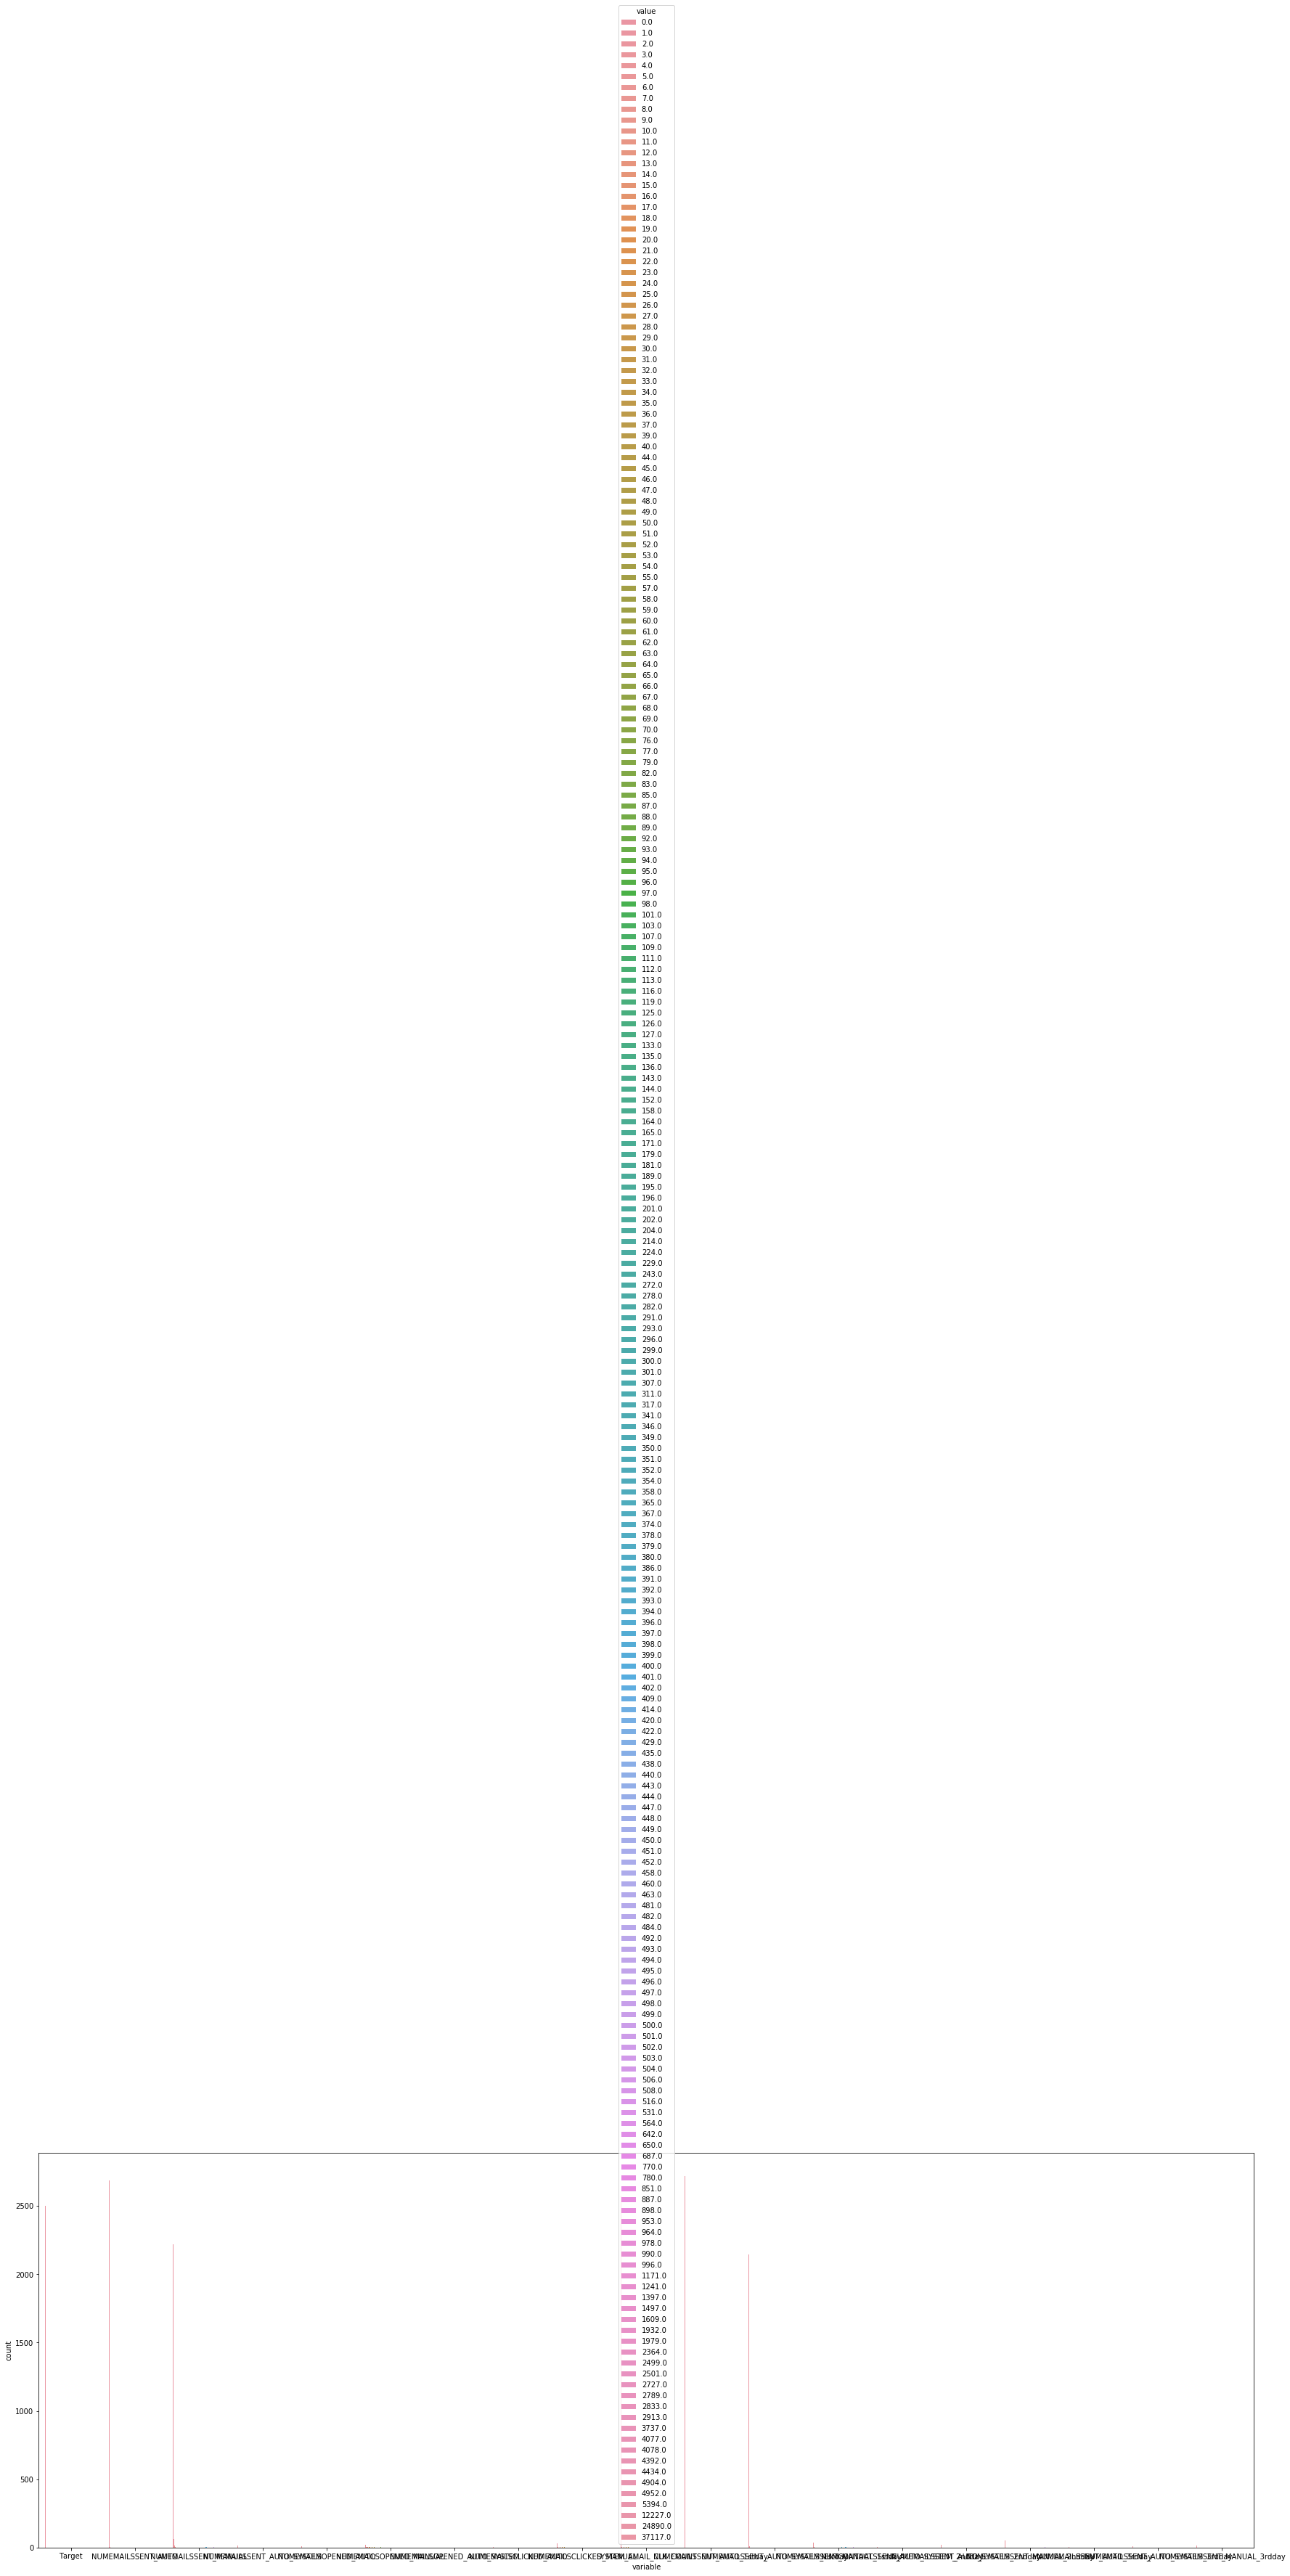

In [69]:
data=pd.DataFrame()
data = sample[['Target','NUMEMAILSSENT_AUTO','NUMEMAILSSENT_MANUAL','NUMEMAILSSENT_AUTO_SYSTEM','NUMEMAILSOPENED_AUTO','NUMEMAILSOPENED_MANUAL',
              'NUMEMAILSOPENED_AUTO_SYSTEM','NUMEMAILSCLICKED_AUTO','NUMEMAILSCLICKED_MANUAL','SYSTEM_EMAIL_CLK_COUNT',
              'NUMEMAILSSENT_AUTO_1stday','NUMEMAILSSENT_AUTO_SYSTEM_1stday','NUMEMAILSSENT_MANUAL_1stday','NUMCONTACTSSENT_AUTO_SYSTEM_2ndday',
              'NUMEMAILSSENT_AUTO_SYSTEM_2ndday','NUMEMAILSSENT_MANUAL_2ndday','NUMEMAILSSENT_AUTO_3rdday',
              'NUMEMAILSSENT_AUTO_SYSTEM_3rdday','NUMEMAILSSENT_MANUAL_3rdday']]
#data
plt.figure(figsize=(30,10))
# #data.boxplot(vert=False,hue='Target')
# sns.boxplot(data=data, orient="h", hue='Target')

df = pd.melt(data)
sns.countplot(data=df, x='variable', hue='value')

In [ ]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
tdata=data[data['Target']==1]
#tdata_scale=(tdata-tdata.mean())/tdata.std()
tdata.hist(ax = ax2)

In [ ]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
tdata=data[data['Target']==0]
#tdata_scale=(tdata-tdata.mean())/tdata.std()
tdata.hist(ax = ax2)

In [ ]:
# # Take the log of population and gdp_per_capita
# log_columns=[]
# for each in numeric[0:80]:
#     log_each=each+"_log"
#     log_columns.append(log_each)
#     sample[log_each]=np.abs((sample[each]-sample[each].min())/(sample[each].max()-sample[each].min()))
#     sample[log_each]=sample[log_each]+1
#     sample[log_each] = np.log10(sample[log_each])

# # Drop the non-transformed columns
# #df = df.drop(columns = ['pop', 'gdp_per_cap'])

In [ ]:
# fig = plt.figure(figsize = (30,30))
# ax2 = fig.gca()
# tdata_log=sample[log_columns]
# #tdata_scale=(tdata_log-tdata_log.min())/(tdata_log.max()-tdata_log.min())
# tdata_log[log_columns[0:40]].hist(ax = ax2)

In [ ]:
# fig = plt.figure(figsize = (30,30))
# ax2 = fig.gca()
# ndata_log=sample[log_columns]
# #tdata_scale=(tdata_log-tdata_log.mean())/tdata_log.std()
# ndata_log[log_columns[41:80]].hist(ax = ax2)

In [74]:
sample.columns

Index(['appname', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILSOPENED_AUTO',
       ...
       'opportunity_owner_name', 'opportunity_demo_date', 'trial_date',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'sales_cohort_date', 'promo_customer', 'Target'],
      dtype='object', length=164)

In [ ]:
# from scipy.stats import boxcox
# from matplotlib import pyplot

# # Take the log of population and gdp_per_capita
# boxcox_columns=[]
# for each in numeric:
#     bc_each=each+"_bc"
#     boxcox_columns.append(bc_each)
#     sample[bc_each]=np.abs((sample[each]-sample[each].min())/(sample[each].max()-sample[each].min()))
#     sample[bc_each]=sample[bc_each]+1
#     sample[bc_each],lam = boxcox(sample[bc_each])


In [ ]:
#boxcox_columns

In [ ]:
# fig = plt.figure(figsize = (20,20))
# ax2 = fig.gca()
# tdata_log=sample[sample['Target']==1][boxcox_columns]
# #tdata_scale=(tdata_log-tdata_log.min())/(tdata_log.max()-tdata_log.min())
# tdata_log[boxcox_columns[0:20]].hist(ax = ax2)

In [ ]:
sample.columns

In [75]:
mergedata_final=mergedata[~mergedata['appname'].isin(sample['appname'])]
mergedata_final['appname'].nunique()
mergedata_final.columns

Index(['appname', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       ...
       'opportunity_owner_name', 'opportunity_demo_date', 'trial_date',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'sales_cohort_date', 'promo_customer', 'Target'],
      dtype='object', length=177)

In [76]:
emptycolumns=[]
for each in numeric:
    if mergedata_final[each].sum()==0:
        emptycolumns.append(each)
emptycolumns 

[]

In [77]:
mergedata_final.drop(emptycolumns,axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
mergedata_final.isna().sum()/mergedata_final.shape[0]

In [79]:
mergedata_final.fillna("missing",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [80]:
mergedata_final2=mergedata_final.drop(['opportunity_stage_name','opportunity_owner_name','opportunity_demo_date',
                                      'promo_customer','sales_cohort_date'],axis=1)

In [84]:
mergedata_final3=pd.merge(mergedata_final2,fisrt_usage_data,how='left',left_on='appname',right_on='appname')

# X_train and X_test split

In [86]:
y=mergedata_final3['Target']
X=mergedata_final3.drop('Target',axis=1)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=.2)
X_train = X_train.copy()
X_test = X_test.copy()
y_train = y_train.copy()
y_test = y_test.copy()

#Modifing String values to clusters for contact lead source and lead lead source

In [88]:
def get_kvalue_train(col,df):
    from sklearn.cluster import KMeans
    from sklearn.feature_extraction.text import TfidfVectorizer
    from scipy.spatial.distance import cdist


    vectorizer = TfidfVectorizer(min_df = 1,lowercase = False, ngram_range = (1,1), use_idf = True, stop_words='english')
    #XTtrain = pd.DataFrame(tv.fit_transform(Xtrain).toarray(), columns=tv.get_feature_names())
    X = pd.DataFrame(vectorizer.fit_transform(df[col]).toarray(),columns=vectorizer.get_feature_names())
    #X = X.toarray()
    distortions=[]
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    # # km = KMeans(n_clusters=3, random_state=0)
    # # km.fit_transform(features)
    # # cluster_labels = km.labels_
    # # cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
    # # pd.concat([corpus_df, cluster_labels], axis=1)
    
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    return X,vectorizer

In [89]:
def get_kvalue_test(col,df,vec):
    X =  pd.DataFrame(vec.transform(df[col]).toarray(),columns=vec.get_feature_names())
    #X = X.toarray()
    return X

In [90]:
def get_clusters_train(df,X,col,k):
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=k, random_state=0)
    km.fit_transform(X)
    print(X.shape)
    print(km.labels_)
    cluster_labels = km.labels_
    print(df[col].shape,"----",cluster_labels.shape)
    cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel_'+col],index=df.index)
    cluster_labels
    pd.concat([df[col], cluster_labels],axis=1)
    df2=pd.concat([df, cluster_labels],axis=1)
    return df2,km             

In [91]:
def get_clusters_test(df,X,col,km):
    km.transform(X)
#     print(X.shape)
#     print(km.labels_)
    cluster_labels = km.predict(X)
    #print(df[col].shape,"----",cluster_labels.shape)
    cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel_'+col],index=df.index)
    
    pd.concat([df[col], cluster_labels],axis=1)
    df2=pd.concat([df, cluster_labels],axis=1)
    return df2             

In [92]:
def convertUrltocluster_train(colname,df):
    colname_new=colname+'_modified'
    df[colname_new]=df[colname].str.strip().str.split('[\W_]+')
    df[colname_new]=df[colname_new].astype(str)
    X,vec=get_kvalue_train(colname_new,df)
    return X,colname_new,vec

In [93]:
def convertUrltocluster_test(colname,df,vec):
    colname_new=colname+'_modified'
    df[colname_new]=df[colname].str.strip().str.split('[\W_]+')
    df[colname_new]=df[colname_new].astype(str)
    X=get_kvalue_test(colname_new,df,vec)
    return X,colname_new

# cluster for lead_lead_source

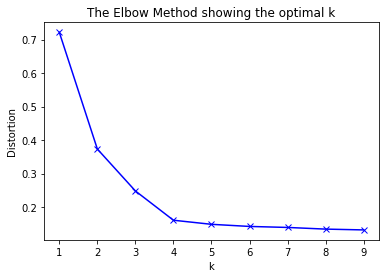

In [94]:
X_train_X,colname_new,vec=convertUrltocluster_train('lead_lead_source',X_train)
   

In [95]:
X_test_X,colname_new=convertUrltocluster_test('lead_lead_source',X_test,vec)
 

In [96]:
X_train2,km=get_clusters_train(X_train,X_train_X,colname_new,4)

(20222, 1660)
[1 1 1 ... 1 3 1]
(20222,) ---- (20222,)


In [97]:
X_test2=get_clusters_test(X_test,X_test_X,colname_new,km)

In [98]:
X_train2.columns

Index(['appname', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       ...
       'Heavy_NUMEMAILSSENT_AUTO', 'Heavy_NUMEMAILSSENT_MANUAL',
       'Heavy_total_action', 'total_email', 'total_contact', 'total_Web',
       'email_user', 'heavy_total_contact', 'lead_lead_source_modified',
       'ClusterLabel_lead_lead_source_modified'],
      dtype='object', length=187)

#cluster for contact_lead_source

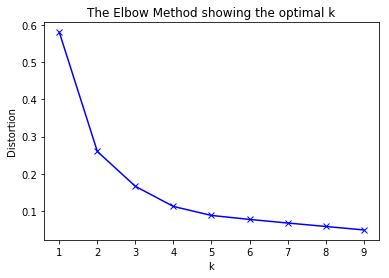

In [99]:
X_train2_X,colname_new,vec=convertUrltocluster_train('contact_lead_source',X_train2)

In [100]:
X_test2_X,colname_new=convertUrltocluster_test('contact_lead_source',X_test2,vec)
 

In [101]:
X_train3,km=get_clusters_train(X_train2,X_train2_X,colname_new,4)

(20222, 636)
[1 1 1 ... 1 1 1]
(20222,) ---- (20222,)


In [102]:
X_test3=get_clusters_test(X_test2,X_test2_X,colname_new,km)

In [ ]:
dtypes = pd.DataFrame(X_train3.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

In [ ]:
numeric

In [ ]:
categorical

#date features modify

In [ ]:
datefeatures1=['trial_date','lead_converted_date','date_1stday', 'date_2ndday',
       'date_3rdday']
for c in datefeatures1:
    print("----------")
    print(c,"----",X_train3[c].dtype)

In [ ]:
X_train3[datefeatures1].head()

In [ ]:
print('lead_converted_date',"------",len(X_train3[X_train3['lead_converted_date']=="missing"]))
#print('sales_cohort_date',"------",len(X_train3[X_train3['sales_cohort_date']=="missing"]))

In [103]:
X_train3['lead_converted_date_imp']=X_train3['lead_converted_date'].copy()

In [104]:
X_test3['lead_converted_date_imp']=X_test3['lead_converted_date'].copy()

In [105]:
X_train3['lead_converted_date_imp'] = np.where(X_train3['lead_converted_date_imp']=="missing", pd.to_datetime(X_train3['trial_date'].astype(str), errors='coerce'),  pd.to_datetime(X_train3['lead_converted_date'].astype(str), errors='coerce'))

In [106]:
X_test3['lead_converted_date_imp'] = np.where(X_test3['lead_converted_date_imp']=="missing", pd.to_datetime(X_test3['trial_date'].astype(str), errors='coerce'),  pd.to_datetime(X_test3['lead_converted_date'].astype(str), errors='coerce'))

In [ ]:
#X_train3[X_train3['lead_converted_date']=="missing"][['lead_converted_date_imp','lead_converted_date']]

In [ ]:
# now = datetime.datetime.now()
# now.strftime('%Y-%m-%d %H:%M:%S') + ('-%02d' % (now.microsecond / 10000))

In [ ]:
# X_train3['opportunity_demo_date_imp']=X_train3['opportunity_demo_date'].copy()

In [ ]:
# X_train3['opportunity_demo_date_imp']=np.where(X_train3['opportunity_demo_date_imp']=="missing",now,  pd.to_datetime(X_train3['opportunity_demo_date_imp'].astype(str), errors='coerce'))


In [ ]:
# X_train3['opportunity_demo_date_imp']

In [ ]:
# X_train3['is_demo_done']=list(map((lambda x: 0 if x=="missing" else 1),X_train3['opportunity_demo_date']))
# X_test3['is_demo_done']=list(map((lambda x: 0 if x=="missing" else 1),X_test3['opportunity_demo_date']))

In [ ]:
# X_train3['is_sales_cohort_done']=list(map((lambda x: 0 if x=="missing" else 1),X_train3['sales_cohort_date']))
# X_test3['is_sales_cohort_done']=list(map((lambda x: 0 if x=="missing" else 1),X_test3['sales_cohort_date']))

In [ ]:
# X_train3.drop(['opportunity_demo_date','sales_cohort_date'],inplace=True,axis=1)
# X_test3.drop(['opportunity_demo_date','sales_cohort_date'],inplace=True,axis=1)

In [107]:
X_train3.drop(['lead_converted_date'],inplace=True,axis=1)
X_test3.drop(['lead_converted_date'],inplace=True,axis=1)

In [108]:
final_datefeatures=['lead_converted_date_imp','date_1stday', 'date_2ndday','date_3rdday']

In [ ]:
# replace missing values in day2 and day3 dates with large values-- current date

In [109]:
X_train3['date_2ndday'].replace(0, datetime.datetime.now(),inplace=True)
X_train3['date_3rdday'].replace(0, datetime.datetime.now(),inplace=True)
X_test3['date_2ndday'].replace(0, datetime.datetime.now(),inplace=True)
X_test3['date_3rdday'].replace(0, datetime.datetime.now(),inplace=True)


In [ ]:
for c in final_datefeatures:
    print("----------")
    X_train3[c] = pd.to_datetime(X_train3[c])
    X_test3[c] = pd.to_datetime(X_test3[c])    
    

In [ ]:
print(X_train3.shape)
print(X_test3.shape)

In [ ]:
# calculate days difference

In [110]:
ndays_columns_set=set()
def calnumberofdays(dataset):
    
    for each in final_datefeatures:
        ndayseach='ndays_'+each
        ndays_columns_set.add(ndayseach)
        dataset[ndayseach]=(dataset[each].dt.date-dataset['trial_date'].dt.date).dt.days


In [111]:
calnumberofdays(X_train3)
calnumberofdays(X_test3)

In [ ]:
ndays_columns_set

In [ ]:
print(X_train3.shape)
print(X_test3.shape)

In [ ]:
list(X_train3.columns)

In [112]:
X_train3['trial_qtr']=X_train3['trial_date'].dt.quarter
X_train3['trial_weekday'] = X_train3['trial_date'].dt.weekday_name
X_train3['trial_month'] = X_train3['trial_date'].dt.month_name()

In [113]:
X_test3['trial_qtr']=X_test3['trial_date'].dt.quarter
X_test3['trial_weekday'] = X_test3['trial_date'].dt.weekday_name
X_test3['trial_month'] = X_test3['trial_date'].dt.month_name()

In [114]:
X_train4=X_train3.drop(['appname','trial_date','date_1stday','date_2ndday','date_3rdday','lead_converted_date_imp'],axis=1)
X_test4=X_test3.drop(['appname','trial_date','date_1stday','date_2ndday','date_3rdday','lead_converted_date_imp'],axis=1)

In [115]:
X_train4=X_train4.drop(['app_name','lead_lead_source','lead_lead_source_modified', 'contact_lead_source_modified','contact_lead_source'],axis=1)
X_test4=X_test4.drop(['app_name','lead_lead_source','lead_lead_source_modified', 'contact_lead_source_modified','contact_lead_source'],axis=1)


In [116]:
scale_mapper = {'None':0,
                'missing':0,
                'Phase 1':1, 
                'Phase 2':2,
                'Phase 3':3,
                'Phase 4':4, 
                'Phase 5':5,
                'Phase 6':6,
                'Phase 7':7, 
                'Phase 8':8,
                'Phase 9':9,
                'Phase 10':10, 
                'Phase 11':11,
                'Phase 12':12,
                'Phase 13':13,
               'Phase 14':14}

In [117]:
X_train4['contact_phase_Scale'] = X_train4['contact_phase'].replace(scale_mapper)
X_test4['contact_phase_Scale'] = X_test4['contact_phase'].replace(scale_mapper)

In [ ]:
X_train4['contact_phase_Scale'].value_counts()

In [118]:
X_train5=X_train4.drop(['contact_phase'],axis=1)
X_test5=X_test4.drop(['contact_phase'],axis=1)

In [ ]:
print(X_train5.shape)
print(X_test5.shape)

In [ ]:
dtypes = pd.DataFrame(X_train5.dtypes.rename('type')).reset_index().astype('str')

numericorig = dtypes[(dtypes.type.isin(['int64','float64']))]['index'].values
categoricalorig = dtypes[~(dtypes['index'].isin(numericorig))]['index'].values

In [ ]:
numericorig

In [ ]:
categoricalorig

In [119]:
categoricalorig_final1=['free_email', 'CONTACTS_UPDATED_diff1stand2nd_trend',
       'CONTACTS_UPDATED_diff2ndand3rd_trend',
       'NUMEMAILSSENT_AUTO_diff1stand2nd_trend',
       'NUMEMAILSSENT_AUTO_diff2ndand3rd_trend',
       'NUMEMAILSSENT_MANUAL_diff1stand2nd_trend',
       'NUMEMAILSSENT_MANUAL_diff2ndand3rd_trend',
       'NUMEMAILS_RECEIVED_diff1stand2nd_trend',
       'NUMEMAILS_RECEIVED_diff2ndand3rd_trend',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd_trend',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff2ndand3rd_trend',
       'TOTAL_CONTACTS_ADDED_OTHER_diff1stand2nd_trend',
       'TOTAL_CONTACTS_ADDED_OTHER_diff2ndand3rd_trend',
       'TOTAL_CONTACTS_ADDED_AUTO_diff1stand2nd_trend',
       'TOTAL_CONTACTS_ADDED_AUTO_diff2ndand3rd_trend',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff1stand2nd_trend',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff2ndand3rd_trend',
       'LOGIN_COUNT_diff1stand2nd_trend',
       'LOGIN_COUNT_diff2ndand3rd_trend',
       'USER_LOGINS_diff1stand2nd_trend',
       'USER_LOGINS_diff2ndand3rd_trend',
       'merchant_infu_created_diff1stand2nd_trend',
       'merchant_infu_created_diff2ndand3rd_trend',
       'funnel_created_diff1stand2nd_trend',
       'funnel_created_diff2ndand3rd_trend',
       'broadcasts_created_diff1stand2nd_trend',
       'broadcasts_created_diff2ndand3rd_trend',
       'actions_created_diff1stand2nd_trend',
       'actions_created_diff2ndand3rd_trend',
       'ClusterLabel_lead_lead_source_modified',
       'ClusterLabel_contact_lead_source_modified', 'trial_weekday',
       'trial_month','trial_qtr']

numeric_final1=['NUM_CONTACTS', 'NUMEMAILSSENT_AUTO', 'NUMCONTACTSSENT_AUTO',
       'NUMEMAILSSENT_MANUAL', 'NUMCONTACTSSENT_MANUAL',
       'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMCONTACTSSENT_AUTO_SYSTEM',
       'NUMEMAILS_RECEIVED', 'NUMCONTACTS_RECEIVED',
       'NUMEMAILSOPENED_AUTO', 'NUMCONTACTSOPENED_AUTO',
       'NUMEMAILSOPENED_MANUAL', 'NUMCONTACTSOPENED_MANUAL',
       'NUMEMAILSOPENED_BROADCAST', 'NUMCONTACTSOPENED_BROADCAST',
       'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_NULL', 'NUMEMAILSCLICKED_AUTO',
       'NUMCONTACTSCLICKED_AUTO', 'NUMEMAILSCLICKED_MANUAL',
       'NUMCONTACTSCLICKED_MANUAL', 'NUMEMAILSCLICKED_NULL',
       'CONTACTS_UPDATED', 'PROCESSED_FLOW_ITEM_COUNT', 'LOGIN_COUNT',
       'USER_LOGINS', 'WEBFORM_COUNT', 'WEBFORM_NUM_FORMS',
       'WEBFORM_NEW_CONTACTS', 'WEBFORM_REFERRING_DOMAINS',
       'SYSTEM_EMAIL_CLK_COUNT', 'GOAL_ACHIEVED_COUNT',
       'FLOW_RECIPIENT_COUNT', 'CONTACT_GROUP_COUNT',
       'CONTACTS_ADDED_AUTO', 'CONTACTS_ADDED_OTHER',
       'TOTAL_CONTACTS_ADDED_AUTO', 'TOTAL_CONTACTS_ADDED_OTHER',
       'WEB_ANALYTICS_NUM_PAGES', 'WEB_ANALYTICS_NUM_PAGEVIEWS',
       'WEB_ANALYTICS_UNIQUE_VISITORS', 'WEB_ANALYTICS_UNIQUE_CONTACTS',
       'WEB_ANALYTICS_UNIQUE_CUSTOMERS', 'WEB_ANALYTICS_TOTAL_VIEWS',
       'total_processed_usd', 'num_integrations', 'broadcasts_created',
       'campaigns_created', 'funnel_created', 'funnel_published',
       'invoice_amount', 'invoice_created', 'num_invoice_promos',
       'invoices_paid', 'lead_sources', 'actions_created',
       'autotag_config_created', 'merchant_account_created',
       'merchant_infu_created', 'number_of_notes_created',
       'number_of_tasks_created', 'CONTACTS_UPDATED_1stday',
       'LOGIN_COUNT_1stday', 'NUMCONTACTSSENT_AUTO_SYSTEM_1stday',
       'NUMEMAILSSENT_AUTO_1stday', 'NUMEMAILSSENT_AUTO_SYSTEM_1stday',
       'NUMEMAILSSENT_MANUAL_1stday', 'NUMEMAILS_RECEIVED_1stday',
       'TOTAL_CONTACTS_ADDED_AUTO_1stday',
       'TOTAL_CONTACTS_ADDED_OTHER_1stday', 'USER_LOGINS_1stday',
       'actions_created_1stday', 'broadcasts_created_1stday',
       'funnel_created_1stday', 'merchant_infu_created_1stday',
       'CONTACTS_UPDATED_2ndday', 'LOGIN_COUNT_2ndday',
       'NUMCONTACTSSENT_AUTO_SYSTEM_2ndday', 'NUMEMAILSSENT_AUTO_2ndday',
       'NUMEMAILSSENT_AUTO_SYSTEM_2ndday', 'NUMEMAILSSENT_MANUAL_2ndday',
       'NUMEMAILS_RECEIVED_2ndday', 'TOTAL_CONTACTS_ADDED_AUTO_2ndday',
       'TOTAL_CONTACTS_ADDED_OTHER_2ndday', 'USER_LOGINS_2ndday',
       'actions_created_2ndday', 'broadcasts_created_2ndday',
       'funnel_created_2ndday', 'merchant_infu_created_2ndday',
       'CONTACTS_UPDATED_3rdday', 'LOGIN_COUNT_3rdday',
       'NUMCONTACTSSENT_AUTO_SYSTEM_3rdday', 'NUMEMAILSSENT_AUTO_3rdday',
       'NUMEMAILSSENT_AUTO_SYSTEM_3rdday', 'NUMEMAILSSENT_MANUAL_3rdday',
       'NUMEMAILS_RECEIVED_3rdday', 'TOTAL_CONTACTS_ADDED_AUTO_3rdday',
       'TOTAL_CONTACTS_ADDED_OTHER_3rdday', 'USER_LOGINS_3rdday',
       'actions_created_3rdday', 'broadcasts_created_3rdday',
       'funnel_created_3rdday', 'merchant_infu_created_3rdday',
       'CONTACTS_UPDATED_diff1stand2nd', 'CONTACTS_UPDATED_diff2ndand3rd',
       'NUMEMAILSSENT_AUTO_diff1stand2nd',
       'NUMEMAILSSENT_AUTO_diff2ndand3rd',
       'NUMEMAILSSENT_MANUAL_diff1stand2nd',
       'NUMEMAILSSENT_MANUAL_diff2ndand3rd',
       'NUMEMAILS_RECEIVED_diff1stand2nd',
       'NUMEMAILS_RECEIVED_diff2ndand3rd',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff2ndand3rd',
       'TOTAL_CONTACTS_ADDED_OTHER_diff1stand2nd',
       'TOTAL_CONTACTS_ADDED_OTHER_diff2ndand3rd',
       'TOTAL_CONTACTS_ADDED_AUTO_diff1stand2nd',
       'TOTAL_CONTACTS_ADDED_AUTO_diff2ndand3rd',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff1stand2nd',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff2ndand3rd',
       'LOGIN_COUNT_diff1stand2nd', 'LOGIN_COUNT_diff2ndand3rd',
       'USER_LOGINS_diff1stand2nd', 'USER_LOGINS_diff2ndand3rd',
       'merchant_infu_created_diff1stand2nd',
       'merchant_infu_created_diff2ndand3rd',
       'funnel_created_diff1stand2nd', 'funnel_created_diff2ndand3rd',
       'broadcasts_created_diff1stand2nd',
       'broadcasts_created_diff2ndand3rd',
       'actions_created_diff1stand2nd', 'actions_created_diff2ndand3rd',
       'ndays_lead_converted_date_imp', 'ndays_date_1stday',
       'ndays_date_2ndday', 'ndays_date_3rdday','contact_phase_Scale']

#ordinal=['contact_phase_Scale']

In [120]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
X_trainnumss = pd.DataFrame(ss.fit_transform(X_train5[numeric_final1]), columns=['ss_'+x for x in numeric_final1],index=X_train5.index)
X_trainnumss = pd.concat([X_train5, X_trainnumss], axis=1)
X_trainnumss = X_trainnumss.drop(numeric_final1, axis=1)
X_trainnumss.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,free_email,CONTACTS_UPDATED_diff1stand2nd_trend,CONTACTS_UPDATED_diff2ndand3rd_trend,NUMEMAILSSENT_AUTO_diff1stand2nd_trend,NUMEMAILSSENT_AUTO_diff2ndand3rd_trend,NUMEMAILSSENT_MANUAL_diff1stand2nd_trend,NUMEMAILSSENT_MANUAL_diff2ndand3rd_trend,NUMEMAILS_RECEIVED_diff1stand2nd_trend,NUMEMAILS_RECEIVED_diff2ndand3rd_trend,NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd_trend,...,ss_funnel_created_diff2ndand3rd,ss_broadcasts_created_diff1stand2nd,ss_broadcasts_created_diff2ndand3rd,ss_actions_created_diff1stand2nd,ss_actions_created_diff2ndand3rd,ss_ndays_lead_converted_date_imp,ss_ndays_date_1stday,ss_ndays_date_2ndday,ss_ndays_date_3rdday,ss_contact_phase_Scale
21915,False,change,no change,no change,no change,no change,no change,no change,no change,no change,...,0.095631,0.131697,0.108163,0.024991,0.034033,0.106578,0.546302,-0.063453,-0.088109,-0.390993
11606,True,change,no change,no change,no change,change,no change,no change,no change,no change,...,0.095631,-0.724907,0.108163,0.024991,0.034033,0.106578,0.546302,-0.063453,-0.088109,-0.390993
9738,False,change,no change,no change,no change,change,no change,no change,no change,no change,...,0.095631,-0.724907,0.108163,0.024991,0.034033,0.106578,0.546302,-0.063453,-0.088109,-0.390993
10257,True,change,no change,no change,no change,no change,no change,no change,no change,change,...,0.095631,0.131697,0.108163,0.024991,0.034033,0.106578,0.546302,-0.063453,-0.088109,-0.390993
5145,False,change,no change,no change,no change,no change,no change,no change,no change,change,...,0.095631,0.131697,0.108163,0.024991,0.034033,0.106578,0.546302,-0.063453,-0.088109,-0.390993


In [121]:
X_testss = pd.DataFrame(ss.transform(X_test5[numeric_final1]), columns=['ss_'+x for x in numeric_final1],index=X_test5.index)
X_testss = pd.concat([X_test5, X_testss], axis=1)
X_testss = X_testss.drop(numeric_final1, axis=1)
X_testss.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,free_email,CONTACTS_UPDATED_diff1stand2nd_trend,CONTACTS_UPDATED_diff2ndand3rd_trend,NUMEMAILSSENT_AUTO_diff1stand2nd_trend,NUMEMAILSSENT_AUTO_diff2ndand3rd_trend,NUMEMAILSSENT_MANUAL_diff1stand2nd_trend,NUMEMAILSSENT_MANUAL_diff2ndand3rd_trend,NUMEMAILS_RECEIVED_diff1stand2nd_trend,NUMEMAILS_RECEIVED_diff2ndand3rd_trend,NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd_trend,...,ss_funnel_created_diff2ndand3rd,ss_broadcasts_created_diff1stand2nd,ss_broadcasts_created_diff2ndand3rd,ss_actions_created_diff1stand2nd,ss_actions_created_diff2ndand3rd,ss_ndays_lead_converted_date_imp,ss_ndays_date_1stday,ss_ndays_date_2ndday,ss_ndays_date_3rdday,ss_contact_phase_Scale
8935,False,change,change,no change,no change,change,change,no change,no change,change,...,0.095631,0.131697,-1.331780,-3.663869,0.034033,0.106578,0.546302,-0.063453,-0.088109,-0.390993
23103,False,no change,no change,no change,no change,no change,no change,no change,no change,no change,...,0.095631,0.131697,0.108163,0.024991,0.034033,-1.474285,0.546302,-0.063453,-0.088109,-0.390993
19361,True,change,change,no change,no change,no change,no change,no change,no change,no change,...,0.095631,0.131697,0.108163,0.024991,0.034033,0.106578,0.546302,-0.063453,-0.088109,-0.390993
3268,False,change,change,no change,no change,change,change,no change,no change,no change,...,-0.359072,0.131697,0.108163,0.024991,0.034033,0.106578,0.546302,-0.063453,-0.088109,-0.390993
5931,True,change,no change,no change,no change,no change,no change,no change,no change,change,...,0.095631,0.131697,0.108163,0.024991,0.034033,0.106578,0.546302,-0.063453,-0.088109,-0.390993


In [122]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False, dtype=int,handle_unknown='ignore')
# X_trainss = pd.DataFrame(ohe.fit_transform(X_trainnumss[categoricalorig_final].astype(str)), columns=ohe.get_feature_names(),index=X_trainnumss.index)
# X_trainss = pd.concat([X_trainnumss, X_trainss], axis=1)
# X_trainss = X_trainss.drop(categorical, axis=1)
# X_trainss.head()



#X_trainss_cat = pd.get_dummies(X_trainnumss[categoricalorig_final1], drop_first=True) # dummy_na=True
#X_trainss_cat = pd.concat([X_trainnumss, X_trainss_cat], axis=1)
#X_trainss_cat = X_trainss_cat.drop(categoricalorig_final1, axis=1)
#X_trainss_cat.head()

,Heavy_contact_update,Heavy_LOGIN_COUNT,Heavy_CONTACT_GROUP_COUNT,Heavy_CONTACTS_ADDED_AUTO,Heavy_CONTACTS_ADDED_OTHER,Heavy_WEB_ANALYTICS_NUM_PAGES,Heavy_NUMEMAILSSENT_AUTO,Heavy_NUMEMAILSSENT_MANUAL,Heavy_total_action,total_email,...,trial_month_December,trial_month_February,trial_month_January,trial_month_July,trial_month_June,trial_month_March,trial_month_May,trial_month_November,trial_month_October,trial_month_September
21915,0,0,0,0,0,0,0,0,1,0.0,...,0,0,0,1,0,0,0,0,0,0
11606,1,0,0,0,0,0,0,1,1,454.0,...,0,0,0,0,0,0,0,0,1,0
9738,1,0,0,0,0,0,0,1,1,444.0,...,0,0,0,0,0,0,0,0,1,0
10257,0,0,0,0,0,0,0,0,1,1.0,...,0,0,0,0,0,1,0,0,0,0
5145,0,0,0,0,0,0,0,0,1,1.0,...,0,0,0,0,0,1,0,0,0,0


In [132]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, dtype=int,handle_unknown='ignore')
X_trainss = pd.DataFrame(ohe.fit_transform(X_trainnumss[categoricalorig_final1].astype(str)), columns=ohe.get_feature_names(),index=X_trainnumss.index)
X_trainss = pd.concat([X_trainnumss, X_trainss], axis=1)
X_trainss = X_trainss.drop(categoricalorig_final1, axis=1)
X_trainss.head()

,Heavy_contact_update,Heavy_LOGIN_COUNT,Heavy_CONTACT_GROUP_COUNT,Heavy_CONTACTS_ADDED_AUTO,Heavy_CONTACTS_ADDED_OTHER,Heavy_WEB_ANALYTICS_NUM_PAGES,Heavy_NUMEMAILSSENT_AUTO,Heavy_NUMEMAILSSENT_MANUAL,Heavy_total_action,total_email,...,x32_June,x32_March,x32_May,x32_November,x32_October,x32_September,x33_1,x33_2,x33_3,x33_4
21915,0,0,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,1,0
11606,1,0,0,0,0,0,0,1,1,454.0,...,0,0,0,0,1,0,0,0,0,1
9738,1,0,0,0,0,0,0,1,1,444.0,...,0,0,0,0,1,0,0,0,0,1
10257,0,0,0,0,0,0,0,0,1,1.0,...,0,1,0,0,0,0,1,0,0,0
5145,0,0,0,0,0,0,0,0,1,1.0,...,0,1,0,0,0,0,1,0,0,0


In [134]:
X_testss_cat=pd.DataFrame(ohe.transform(X_testss[categoricalorig_final1].astype(str)), columns=ohe.get_feature_names(),index=X_testss.index)
X_testss_cat = pd.concat([X_testss, X_testss_cat], axis=1)
X_testss_cat = X_testss_cat.drop(categoricalorig_final1, axis=1)
X_testss_cat.head()

,Heavy_contact_update,Heavy_LOGIN_COUNT,Heavy_CONTACT_GROUP_COUNT,Heavy_CONTACTS_ADDED_AUTO,Heavy_CONTACTS_ADDED_OTHER,Heavy_WEB_ANALYTICS_NUM_PAGES,Heavy_NUMEMAILSSENT_AUTO,Heavy_NUMEMAILSSENT_MANUAL,Heavy_total_action,total_email,...,x32_June,x32_March,x32_May,x32_November,x32_October,x32_September,x33_1,x33_2,x33_3,x33_4
8935,1,0,0,0,0,0,0,0,1,1.0,...,0,0,0,0,0,0,0,1,0,0
23103,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,1,0
19361,0,0,0,0,0,0,0,0,1,0.0,...,1,0,0,0,0,0,0,1,0,0
3268,0,0,0,0,0,0,0,0,1,1.0,...,0,0,0,0,0,0,0,0,1,0
5931,0,0,0,0,0,0,0,0,1,2.0,...,0,0,0,1,0,0,0,0,0,1


In [125]:
#X_testss_cat = pd.get_dummies(X_testss[categoricalorig_final1], drop_first=True) # dummy_na=True
#X_testss_cat = pd.concat([X_testss, X_testss_cat], axis=1)
#X_testss_cat = X_testss_cat.drop(categoricalorig_final1, axis=1)
#X_testss_cat.head()

,Heavy_contact_update,Heavy_LOGIN_COUNT,Heavy_CONTACT_GROUP_COUNT,Heavy_CONTACTS_ADDED_AUTO,Heavy_CONTACTS_ADDED_OTHER,Heavy_WEB_ANALYTICS_NUM_PAGES,Heavy_NUMEMAILSSENT_AUTO,Heavy_NUMEMAILSSENT_MANUAL,Heavy_total_action,total_email,...,trial_month_December,trial_month_February,trial_month_January,trial_month_July,trial_month_June,trial_month_March,trial_month_May,trial_month_November,trial_month_October,trial_month_September
8935,1,0,0,0,0,0,0,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
23103,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
19361,0,0,0,0,0,0,0,0,1,0.0,...,0,0,0,0,1,0,0,0,0,0
3268,0,0,0,0,0,0,0,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
5931,0,0,0,0,0,0,0,0,1,2.0,...,0,0,0,0,0,0,0,1,0,0


In [136]:
main_list = np.setdiff1d(X_trainss.columns,X_testss_cat.columns)
main_list

array([], dtype=object)

In [ ]:
# running logistic regression

In [155]:
from sklearn.model_selection import GridSearchCV

In [176]:
from imblearn.over_sampling import SMOTE

In [177]:
##smote
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_trainss,y_train)

In [178]:
param_test1= {'n_estimators':range(20,100,10)}
gsearch1= GridSearchCV(estimator = GradientBoostingClassifier(
    learning_rate=0.1,min_samples_split=300,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10),
                       param_grid= param_test1, scoring='precision',iid=False,cv=5)

gsearch1.fit(X_res, y_res)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

({'mean_fit_time': array([ 3.66257358,  5.75489101,  6.51731429,  9.31091709,  9.66548381,
         14.29433045, 20.911795  , 24.88497972]),
  'std_fit_time': array([0.37984802, 0.86235799, 0.46249531, 1.04962241, 0.40131532,
         3.92280702, 2.64409084, 2.97397402]),
  'mean_score_time': array([0.04017658, 0.05377002, 0.06579523, 0.08415179, 0.07735672,
         0.12932677, 0.15390234, 0.23357568]),
  'std_score_time': array([0.01258508, 0.00754302, 0.01173139, 0.01898762, 0.00722407,
         0.03703821, 0.02840783, 0.14486841]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80, 90],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80},
   {'n_estimators': 90}],
  'split0_test_score': array([0.9596837

 ## the best percision is getting by estimators 90 and the lowest std is get by estimators 50

In [182]:
param_test2= {'max_depth':range(19,40,2)}
gsearch2= GridSearchCV(estimator = GradientBoostingClassifier(
    learning_rate=0.1,n_estimators=90, max_depth=30,min_samples_leaf=20, max_features='sqrt',min_samples_split=100, subsample=0.8,random_state=10),
                       param_grid= param_test2, scoring='precision',iid=False,cv=5)

gsearch2.fit(X_res, y_res)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'max_depth': range(19, 40, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='precision',
       verbose=0)

In [183]:
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

({'mean_fit_time': array([27.01173902, 28.64280324, 31.6152986 , 32.74845476, 31.72824264,
         30.73020868, 31.33446684, 32.00129108, 31.19634252, 33.54740524,
         35.0785203 ]),
  'std_fit_time': array([0.77164998, 1.2696582 , 1.25159522, 1.66374588, 1.59771803,
         0.43178118, 1.09420778, 1.5388452 , 0.89066945, 3.02062377,
         3.4412532 ]),
  'mean_score_time': array([0.12353683, 0.13273339, 0.1517128 , 0.12773571, 0.136726  ,
         0.13792562, 0.13033404, 0.14631147, 0.13473511, 0.15212049,
         0.13493066]),
  'std_score_time': array([0.0077288 , 0.01162928, 0.03400992, 0.00318677, 0.00828421,
         0.00956434, 0.00233678, 0.02265963, 0.00421111, 0.01353973,
         0.00484868]),
  'param_max_depth': masked_array(data=[19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'m

In [181]:
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([ 5.15023613,  5.48224339,  4.94698968,  5.5455667 ,  8.93491678,
         10.23325858,  9.27876511,  8.42706294, 12.79808664, 13.38924499,
         11.67083678, 11.24194231, 19.6446291 , 17.85619144, 15.85900102,
         13.0293458 , 24.85002904, 20.87927313, 18.27357502, 14.14880652,
         21.21978641, 17.06030426, 15.36489234, 14.2745296 , 24.42598915,
         18.74966455, 16.28029323, 14.05535941, 25.05964708, 19.20860562,
         16.54972205, 16.03247671, 26.91979079, 21.24003735, 18.94213123,
         15.42736931]),
  'std_fit_time': array([0.34018944, 0.61009137, 0.0471375 , 0.77362829, 0.82486672,
         0.4822657 , 0.4955913 , 0.6200338 , 1.2456244 , 1.27760409,
         0.61835975, 1.07630548, 1.5112341 , 1.67922619, 0.69242806,
         0.22396044, 0.70861788, 2.16378768, 1.06748482, 1.73133409,
         0.77479077, 0.23909935, 0.2139891 , 0.25676409, 0.71985128,
         0.21308595, 1.29961194, 0.76286983, 1.21385816, 0.53717184,
         0.

In [ ]:
def print_best_score(gsearch,param_test):
    print("Best score: %0.3f" % gsearch.best_score_)
    print("Best parameters set:")
    best_parameters = gsearch.best_estimator_.get_params()
    for param_name in sorted(param_test.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
print_best_score(gsearch1,param_test1)

In [197]:
from sklearn.ensemble import GradientBoostingClassifier
def learn(x, y, test_x):
    # set sample weight
    clf = GradientBoostingClassifier(
        loss='deviance',learning_rate=0.1,n_estimators=50, max_depth=20,min_samples_leaf=20, max_features='sqrt',min_samples_split=200, subsample=0.8,random_state=10).fit(x,y)
    prediction_train=clf.predict(x)
    prediction_list = clf.predict(test_x)
    y_predprob= clf.predict_proba(test_x)[:,1]
    return prediction_train,prediction_list,y_predprob,clf

In [198]:
pred_test_y_bosted,y_predprob,GB=learn(X_trainss,y_train,X_testss_cat)

In [199]:
from sklearn import metrics
print("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, pred_test_y))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.9646
AUC Score (Train): 0.973685


In [200]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test,pred_test_y)

In [ ]:
for alg in []

In [201]:
print(confusion_matrix2)

[[4694   78]
 [ 101  183]]


In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test_y))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4772
           1       0.70      0.64      0.67       284

   micro avg       0.96      0.96      0.96      5056
   macro avg       0.84      0.81      0.83      5056
weighted avg       0.96      0.96      0.96      5056



In [213]:
## random forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(
    bootstrap = True, max_depth = 80, max_features = 'sqrt', 
    min_samples_leaf = 2, min_samples_split = 5, n_estimators = 200)
rf.fit(X_trainss,y_train)
y_Pred=rf.predict(X_testss_cat)
print(classification_report(y_test,y_Pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4772
           1       0.71      0.67      0.69       284

   micro avg       0.97      0.97      0.97      5056
   macro avg       0.85      0.83      0.84      5056
weighted avg       0.97      0.97      0.97      5056



from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto', class_weight=None)
logreg.fit(X_trainss, y_train)

In [ ]:
# logistic train accuracy and confusion matrix

y_predT = logreg.predict(X_trainss_cat)
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_train,y_predT)
print(confusion_matrix2)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_trainss_cat, y_train)))
from sklearn.metrics import r2_score
print("R2--",r2_score(y_train,y_predT,multioutput='variance_weighted'))

coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],X_trainss_cat.columns):
    coef_dict[feat] = coef
coef_dict 

from sklearn.metrics import classification_report
print(classification_report(y_train, y_predT))

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
def define_model( model):
        clfs = {'RandomForestClassifier': RandomForestClassifier(bootstrap = True, max_depth = 80, max_features = 'sqrt', 
    min_samples_leaf = 2, min_samples_split = 5, n_estimators = 200),
                'LogisticRegression': LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto', class_weight=None),
                'GradientBoostingClassifier': GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=50, max_depth=20,min_samples_leaf=20, max_features='sqrt',min_samples_split=200, subsample=0.8,random_state=20)
                ,'AdaBoostClassifier': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)}
        if model not in clfs:
            raise ConfigError("Unsupported model {}".format(model))
        clf = clfs[model]
        return clf 

In [224]:
Train_dic={};Test_dic={}
i=1
for alg in ['RandomForestClassifier','LogisticRegression','GradientBoostingClassifier']:
    clf=define_model(alg)
    clf.fit(X_trainss,y_train)
    train_Pred=clf.predict(X_trainss)
    train_predprob= clf.predict_proba(X_trainss)[:,1]
    test_Pred=clf.predict(X_testss_cat)
    test_predprob= clf.predict_proba(X_testss_cat)[:,1]
    Train_dic[alg]=train_Pred
    Train_dic[i]=train_predprob
    Test_dic[alg]=test_Pred
    Test_dic[i]=test_predprob
    i=i+1

Stack_Train=pd.DataFrame.from_dict(Train_dic[alg])
Stack_Test=pd.DataFrame.from_dict(Test_dic[alg])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [210]:
def stack_learn(x, y,test_x):
    # set sample weight
    clf = GradientBoostingClassifier(
        loss='deviance',random_state=10).fit(x,y)
    prediction_list = clf.predict(test_x)
    y_predprob= clf.predict_proba(test_x)[:,1]
    return prediction_list,y_predprob,clf

In [221]:
def stack_learn(x, y,test_x):
    # set sample weight
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200).fit(x,y)
    prediction_list = clf.predict(test_x)
    y_predprob= clf.predict_proba(test_x)[:,1]
    return prediction_list,y_predprob,clf

In [ ]:
AdaBoostClassifier

In [225]:
pred_test_y_stack,y_predprob_stack,GB=learn(Stack_Train,y_train,Stack_Test)

In [226]:
print(classification_report(y_test,pred_test_y_stack))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4772
           1       0.71      0.64      0.67       284

   micro avg       0.96      0.96      0.96      5056
   macro avg       0.84      0.81      0.83      5056
weighted avg       0.96      0.96      0.96      5056

